In [2]:
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt
from rl_glue import RLGlue
from tqdm import tqdm
import pickle
import gym
import sys
import envVisual
import agent
from QLearningAgent import QLearningAgent
from ExpectedSarsaAgent import ExpectedSarsaAgent
import gridworld_env

In [11]:
def visualize_state_visits(state_visits, title):
    grid_size = int(np.sqrt(len(state_visits)))
    state_visits_grid = np.array(state_visits).reshape((grid_size, grid_size))

    plt.imshow(state_visits_grid, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='State Visits')

    plt.title(title)
    plt.xlabel('Column')
    plt.ylabel('Row')

In [4]:
base_env = gridworld_env.Environment()
base_env.env_init()

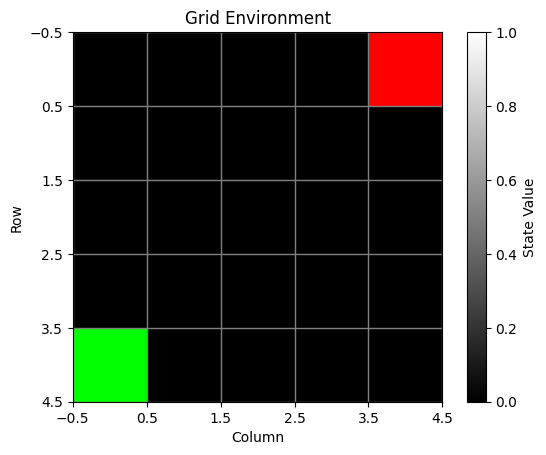

In [5]:
env_visualizer = envVisual.EnvironmentVisualizer(base_env)
env_visualizer.visualize()

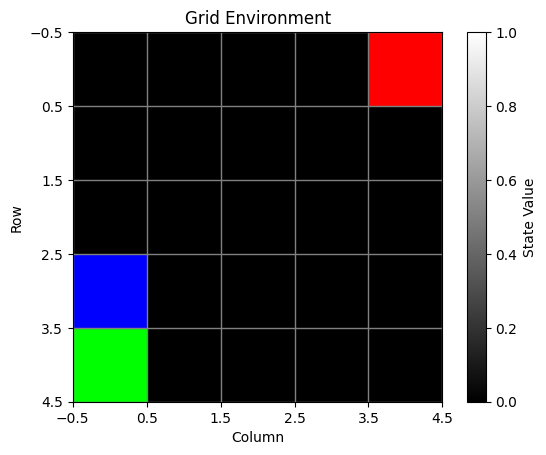

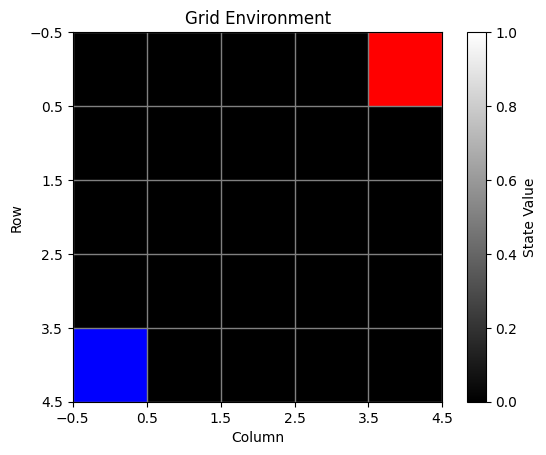

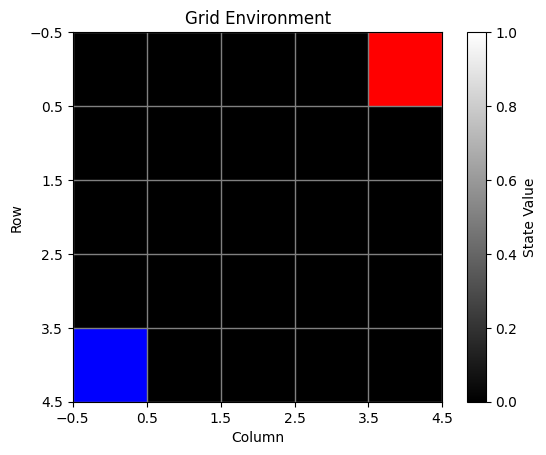

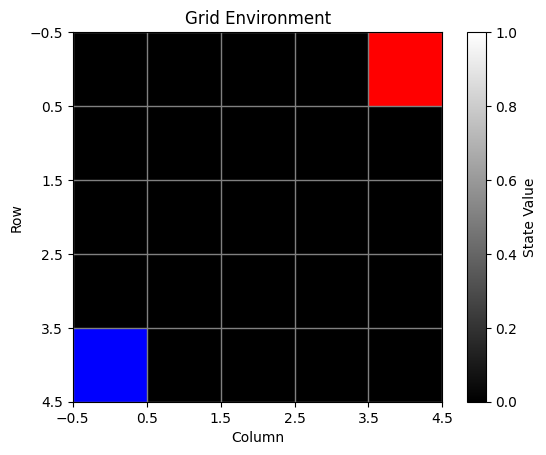

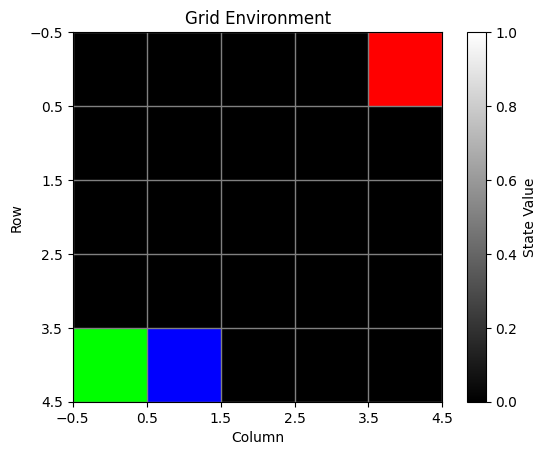

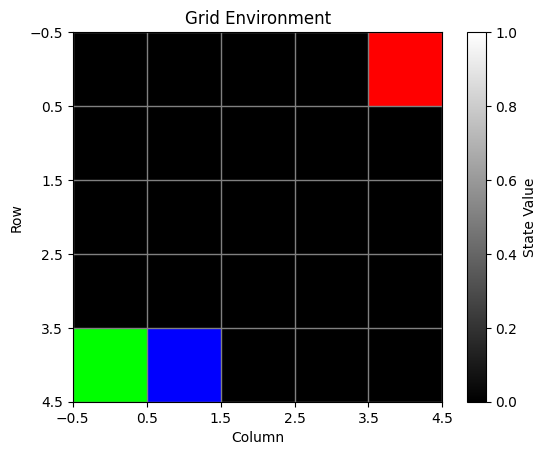

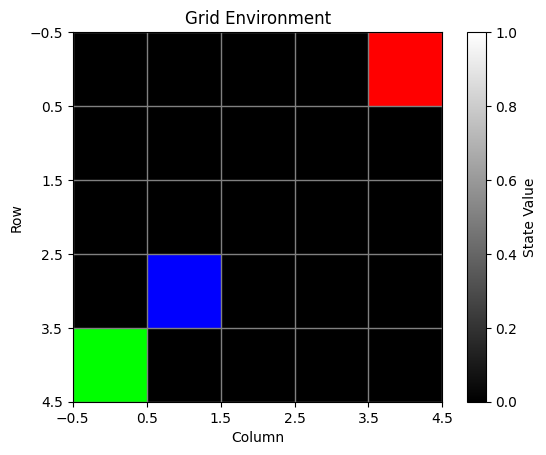

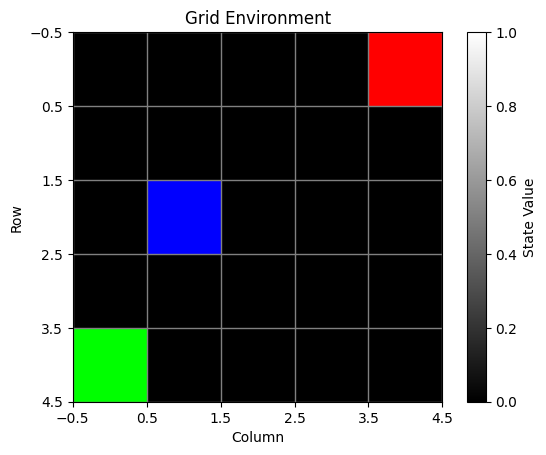

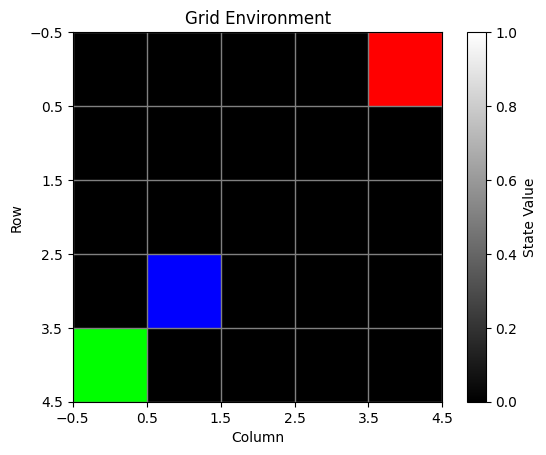

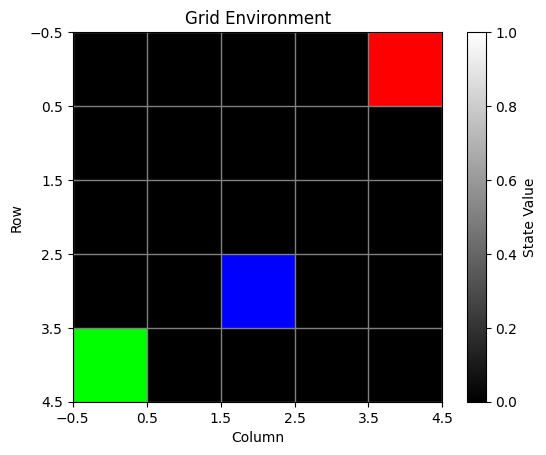

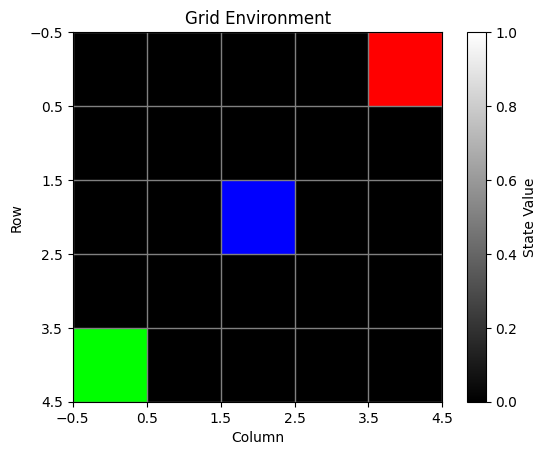

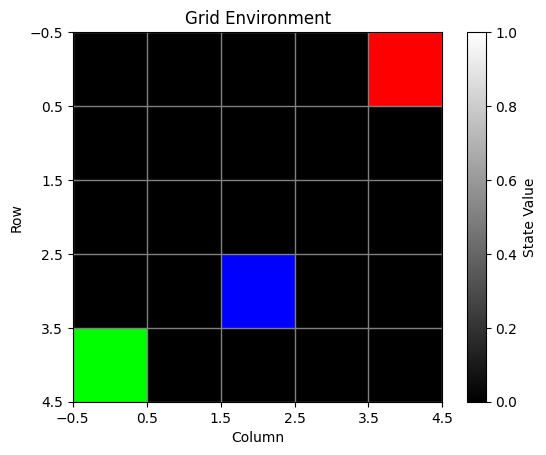

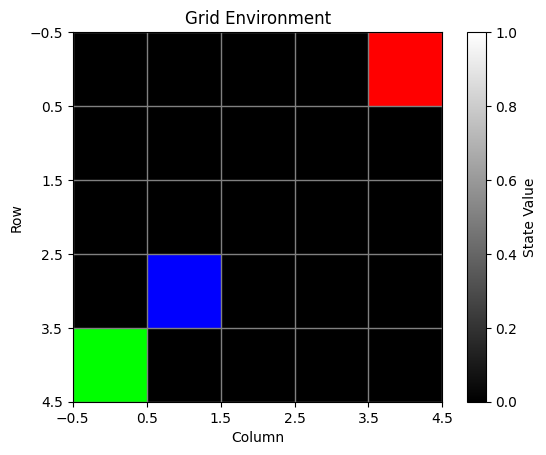

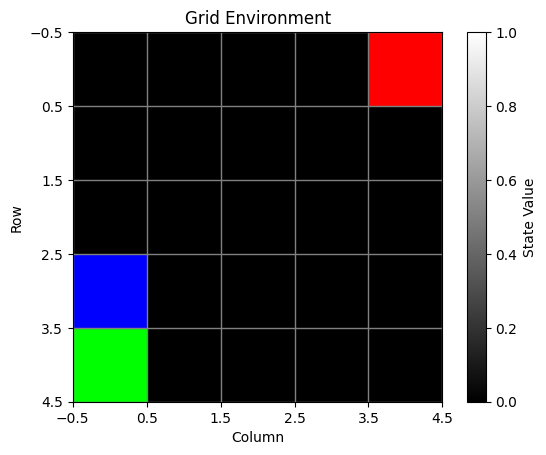

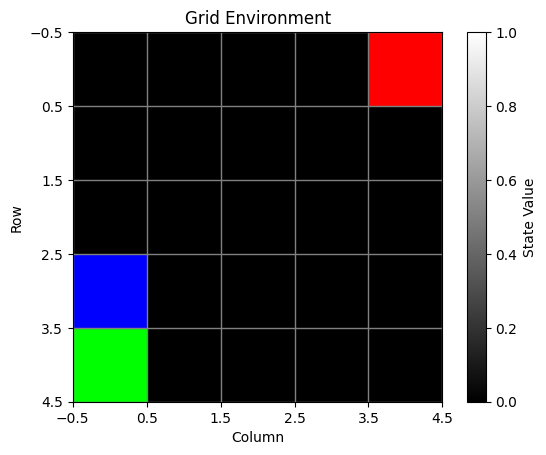

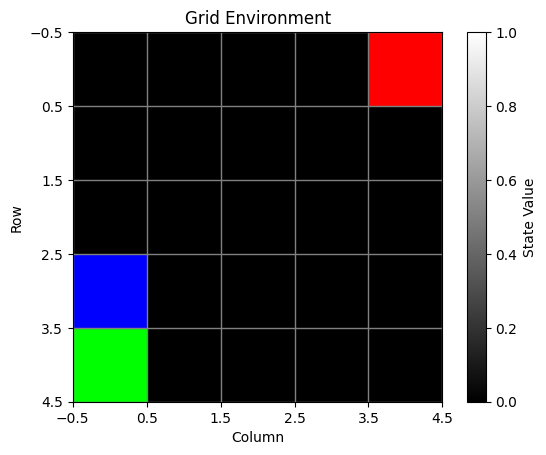

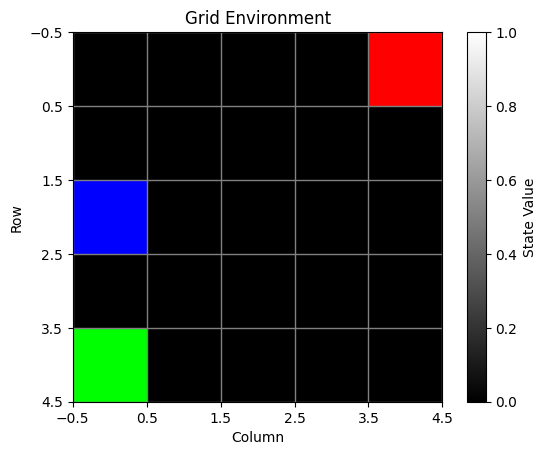

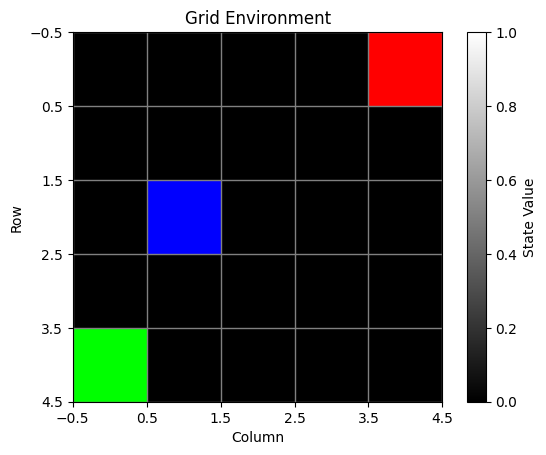

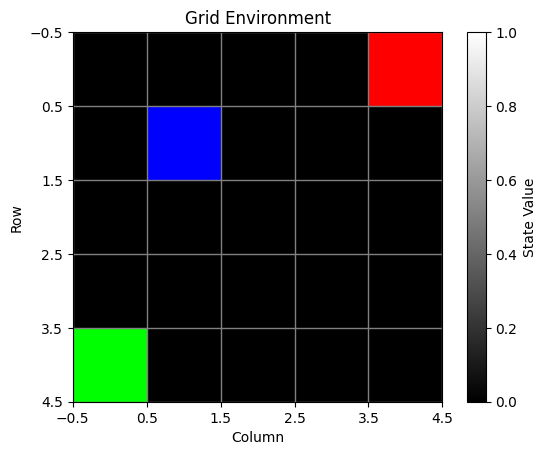

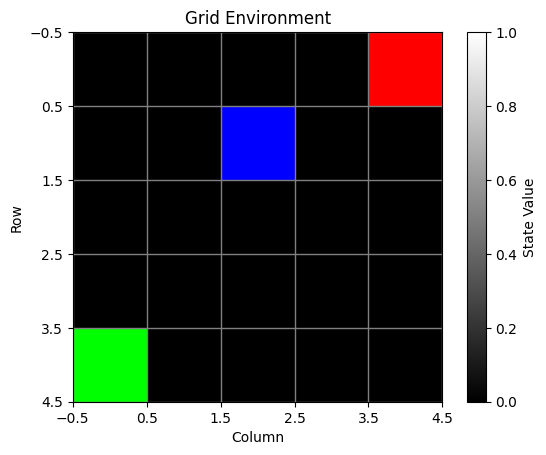

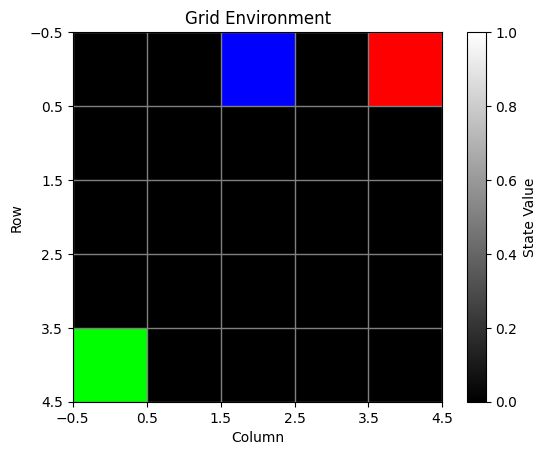

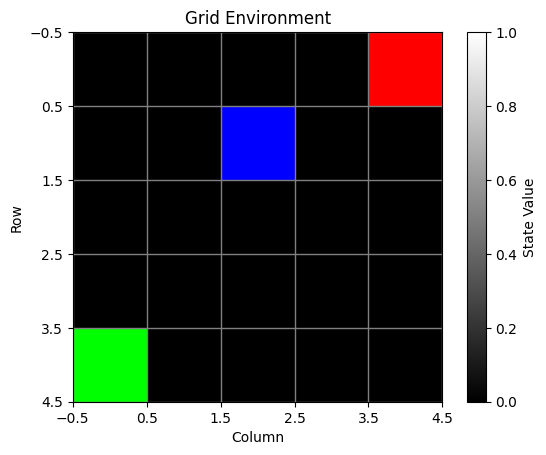

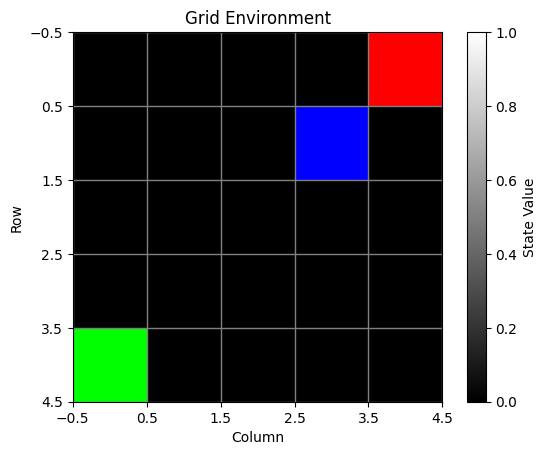

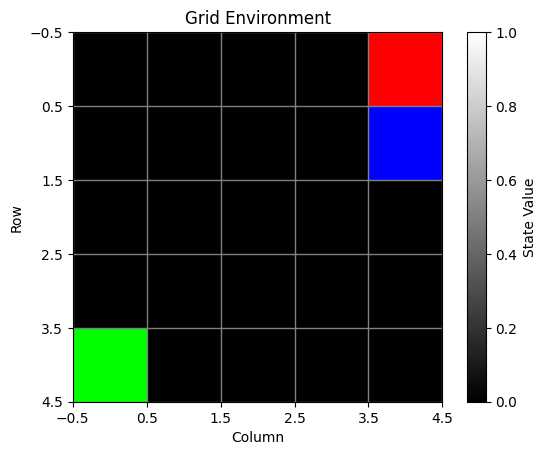

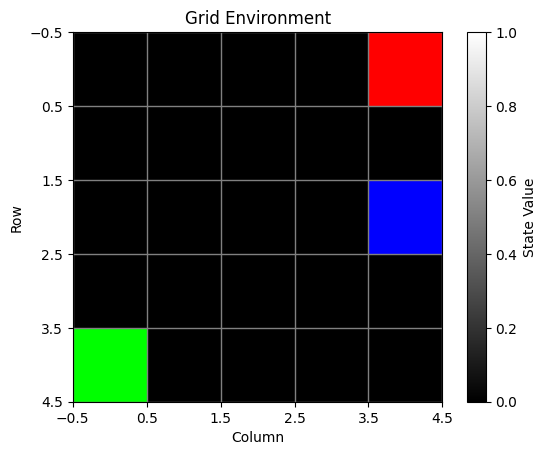

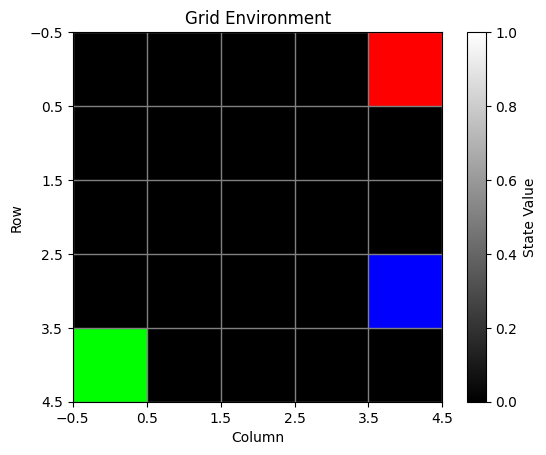

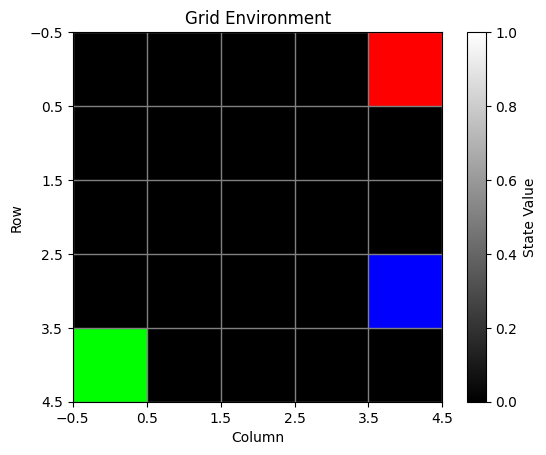

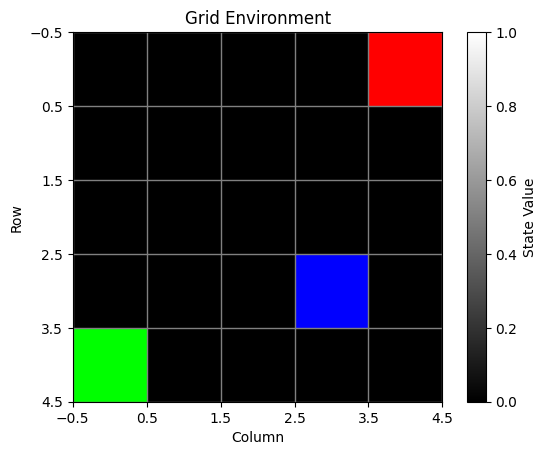

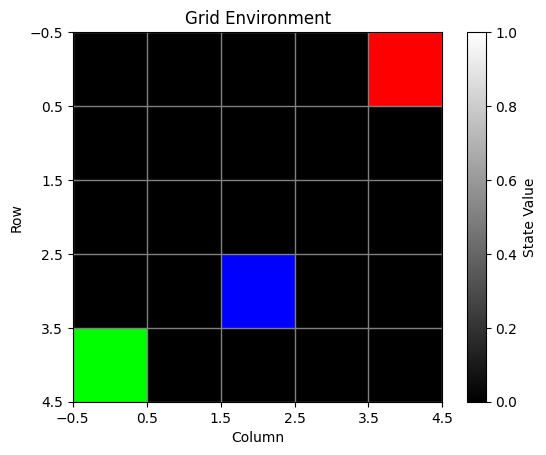

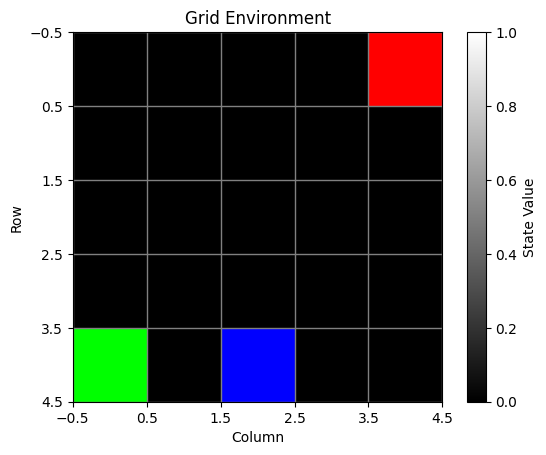

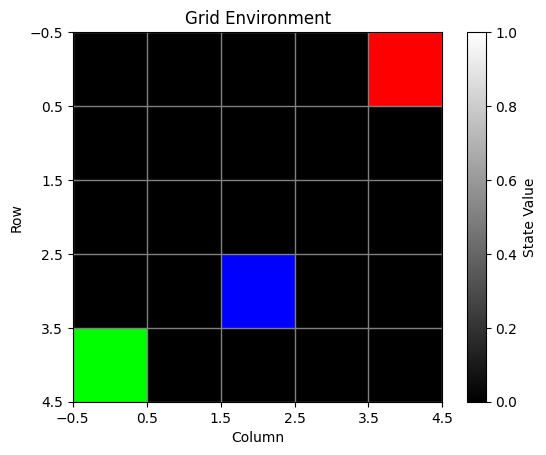

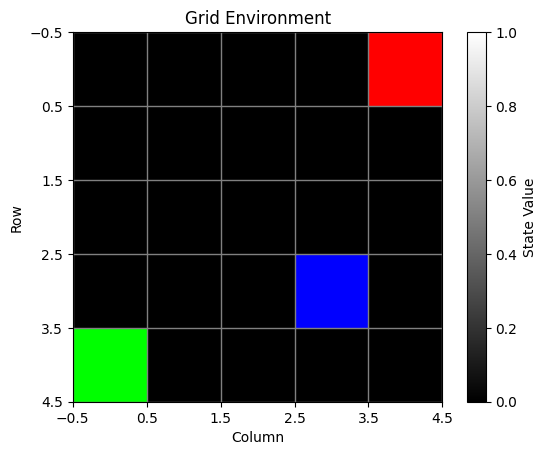

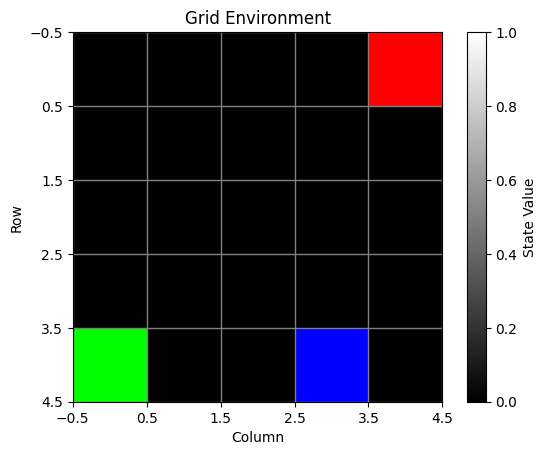

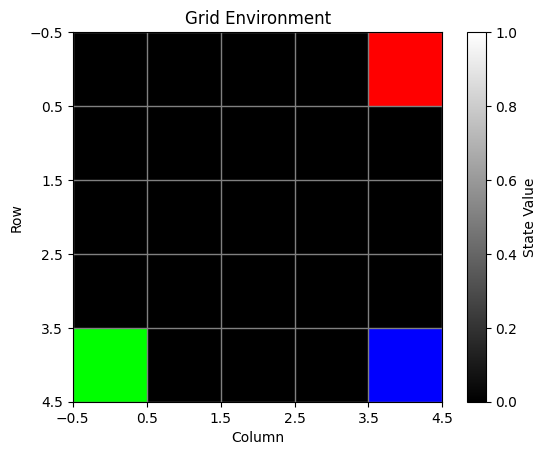

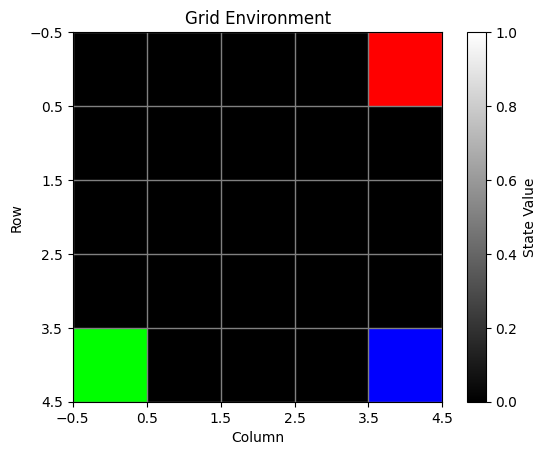

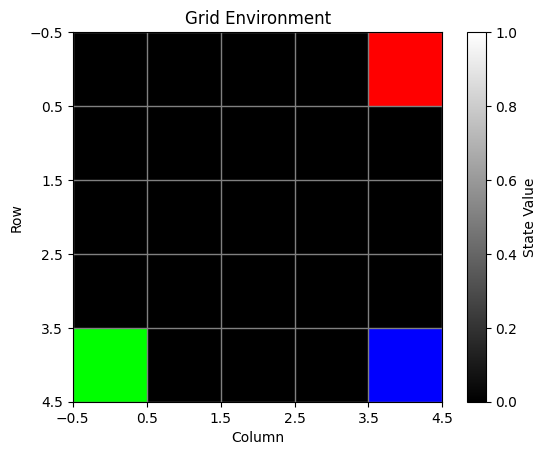

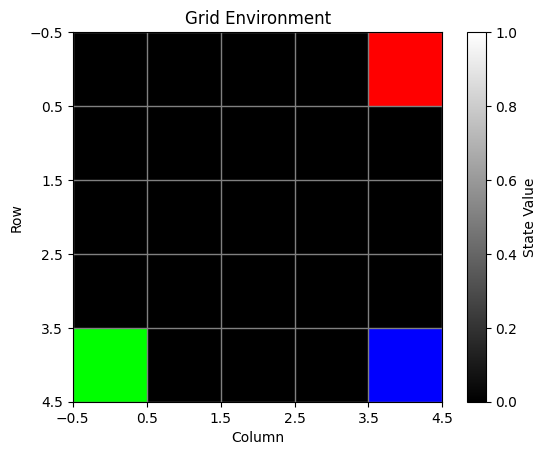

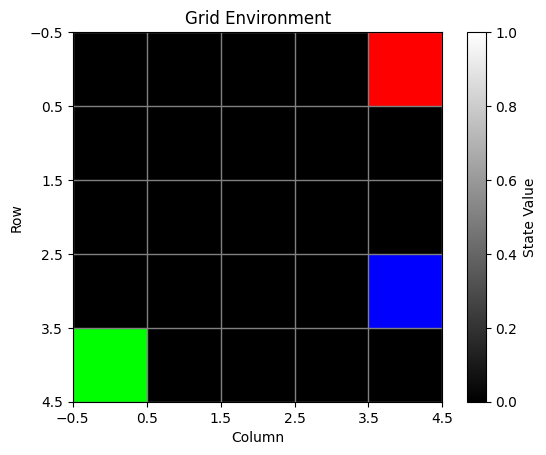

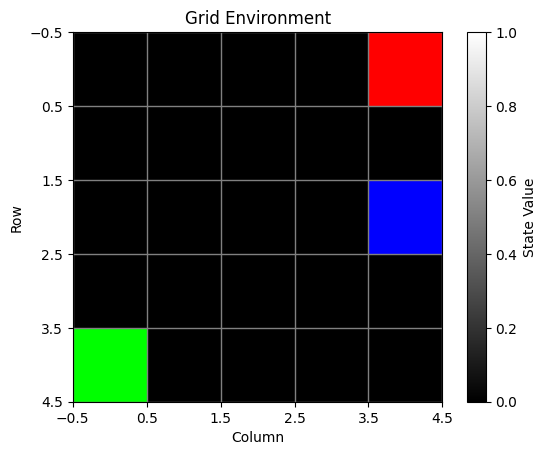

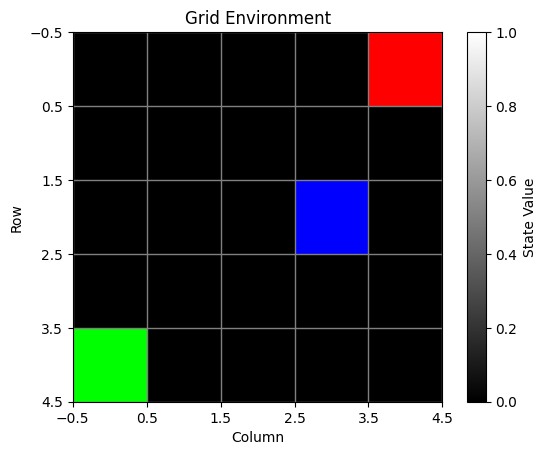

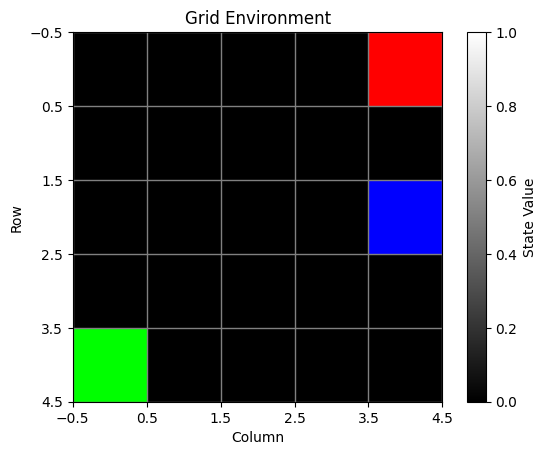

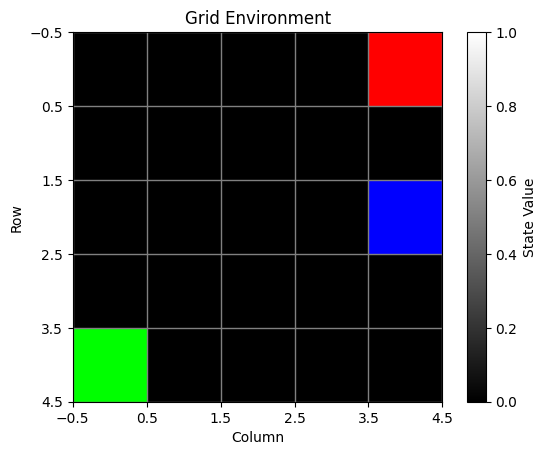

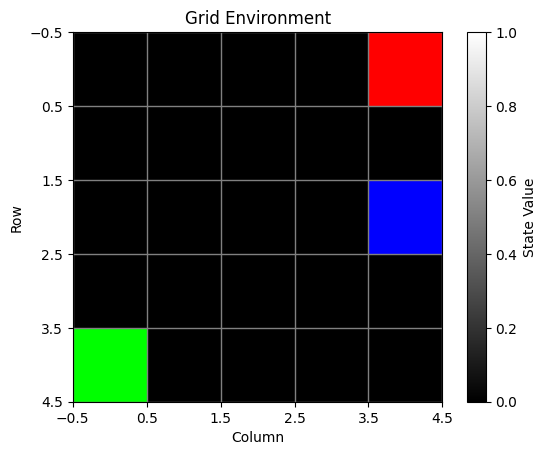

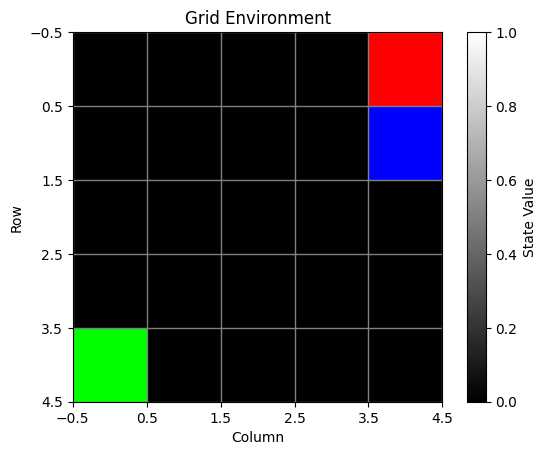

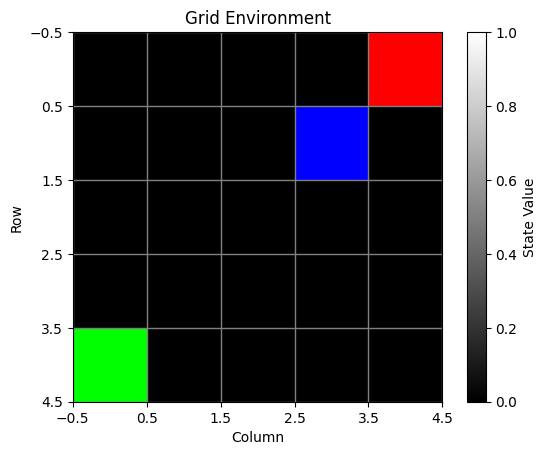

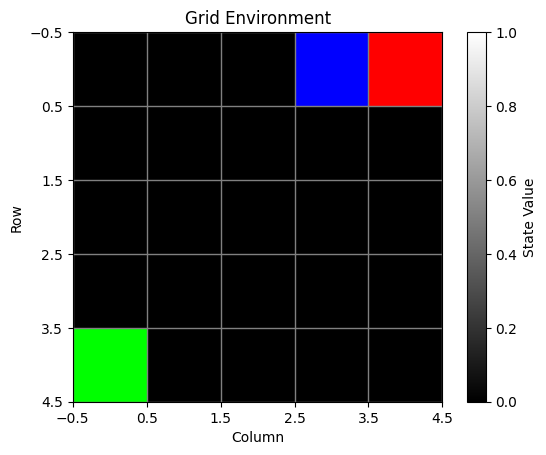

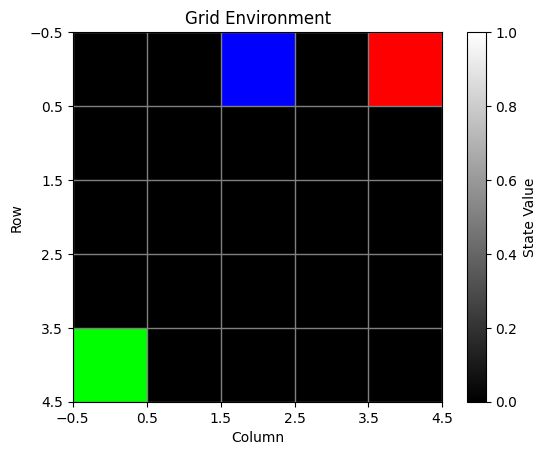

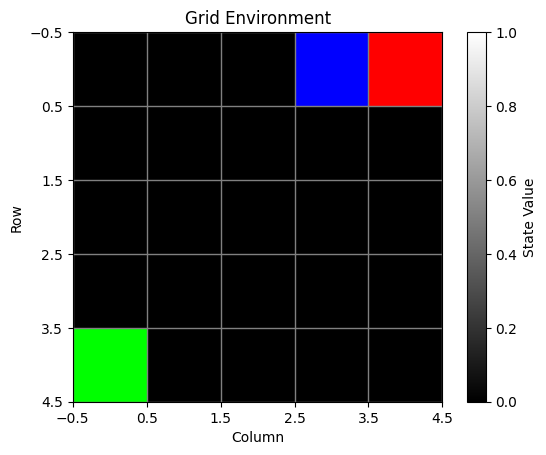

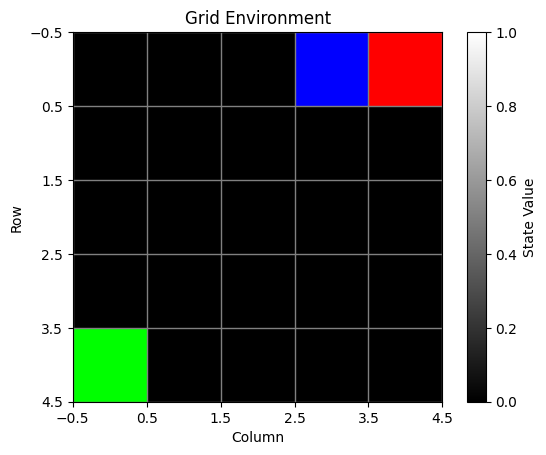

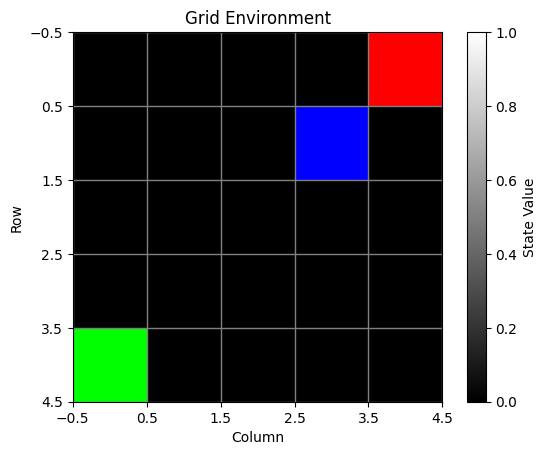

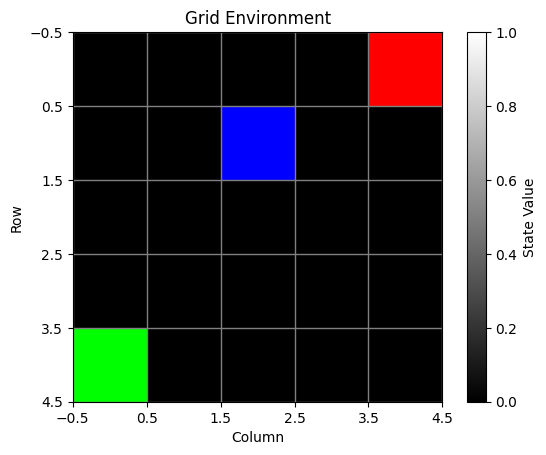

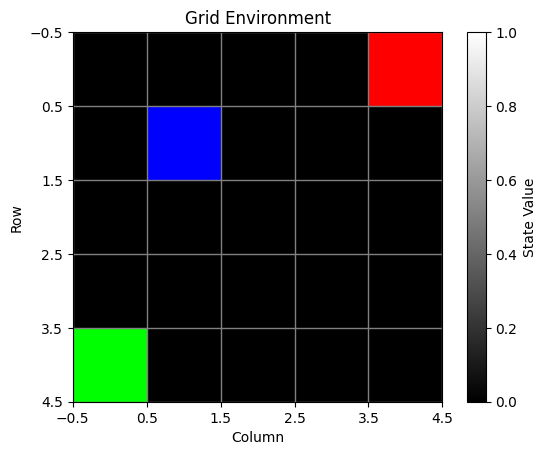

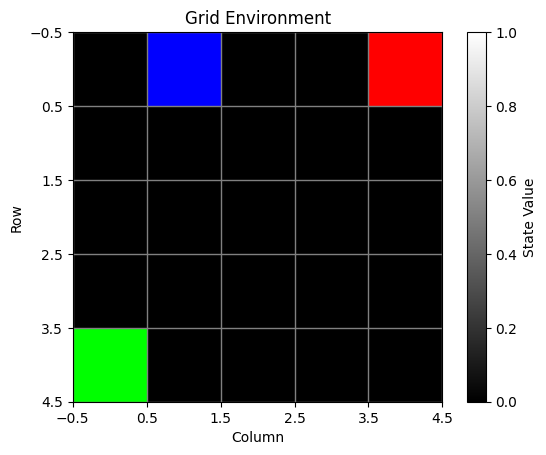

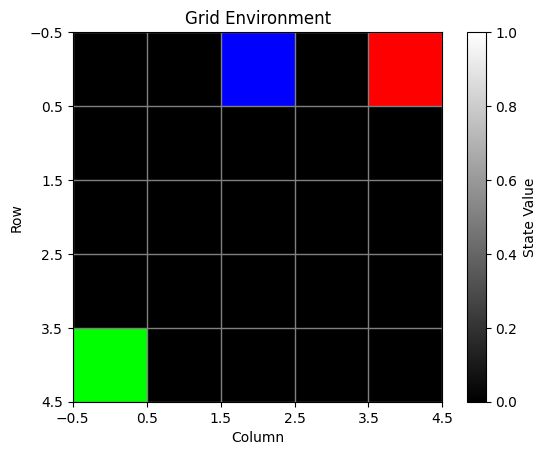

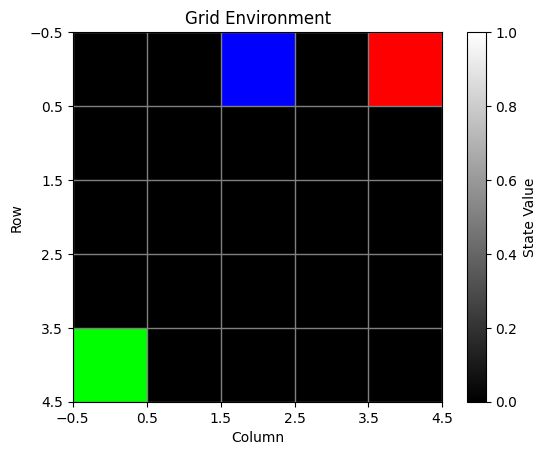

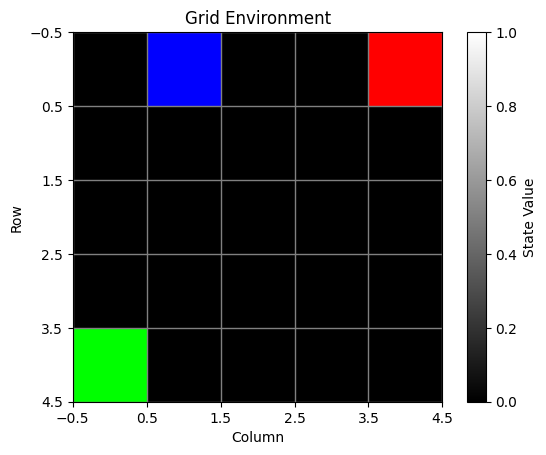

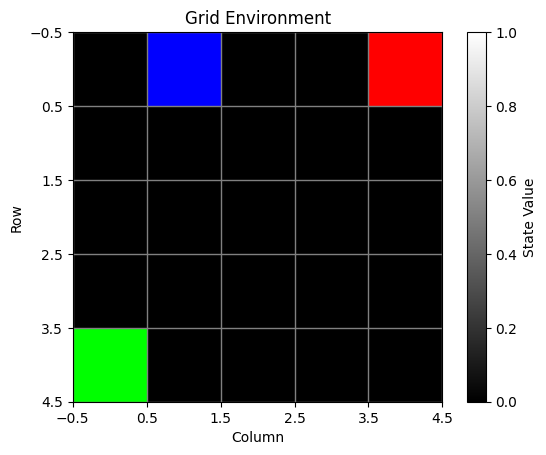

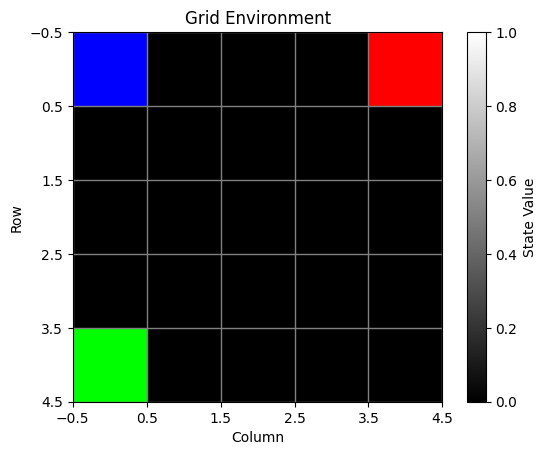

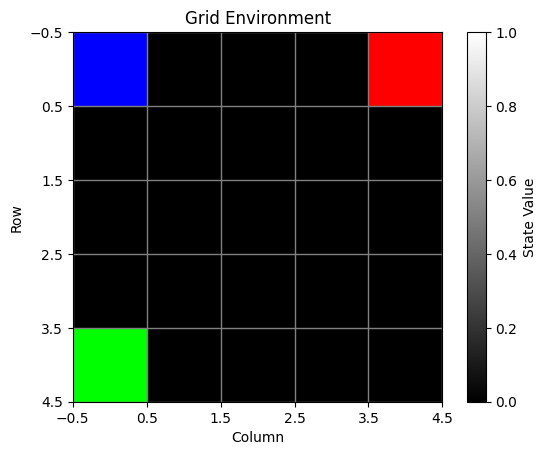

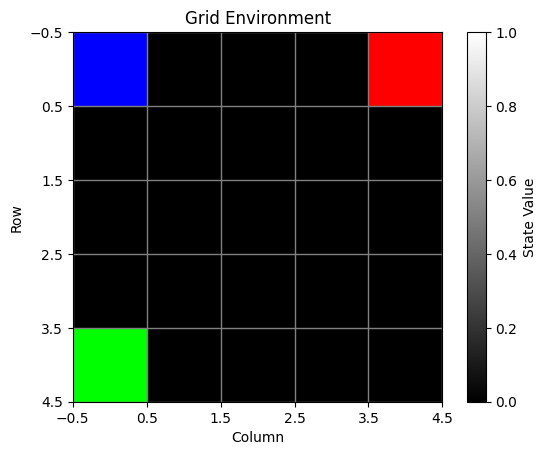

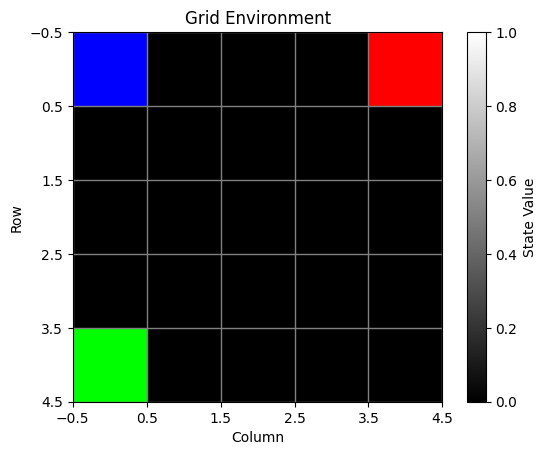

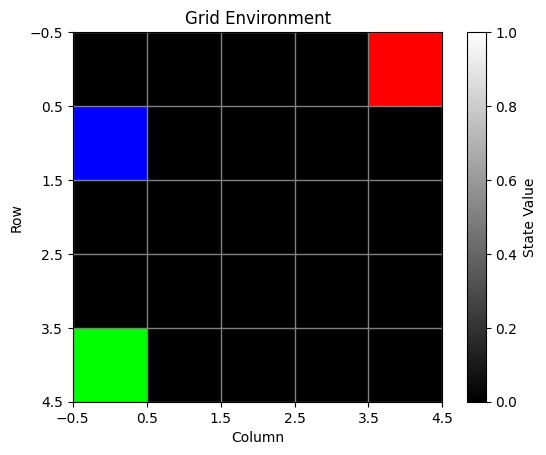

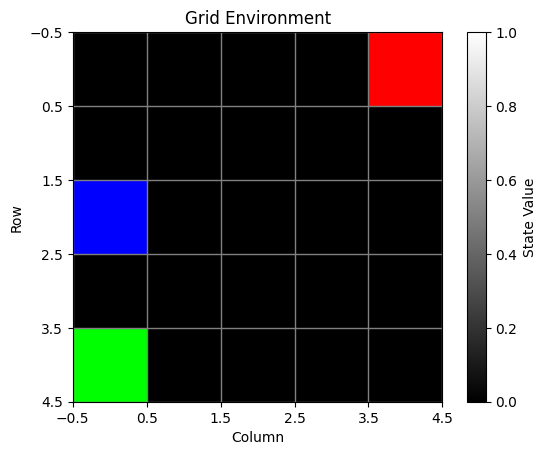

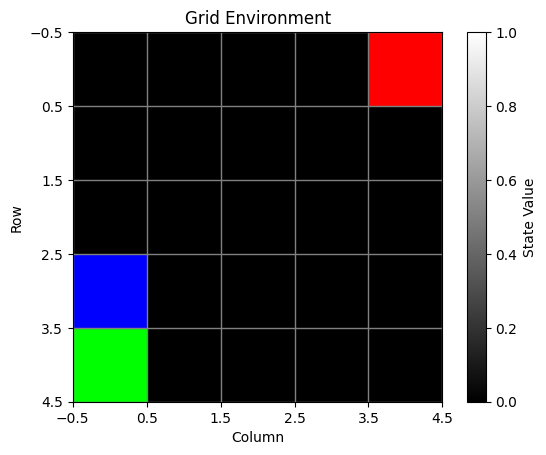

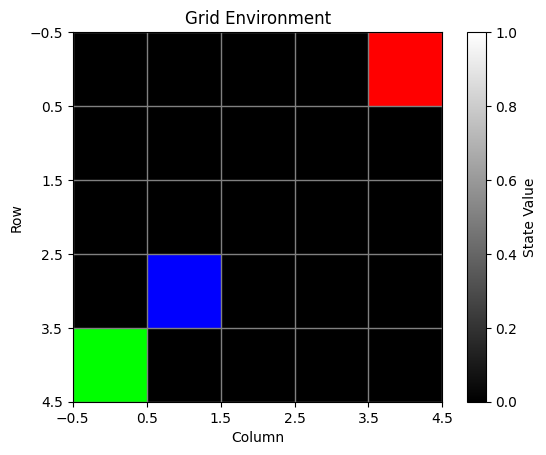

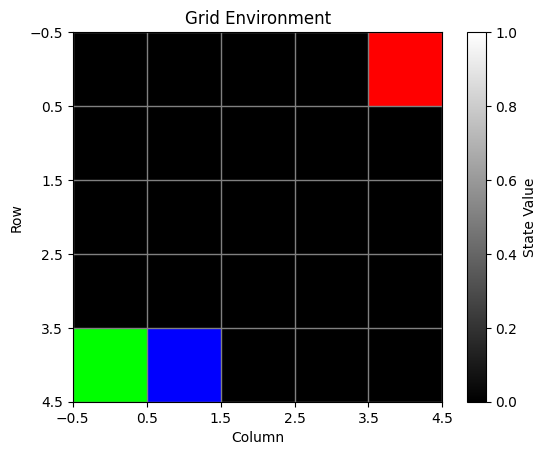

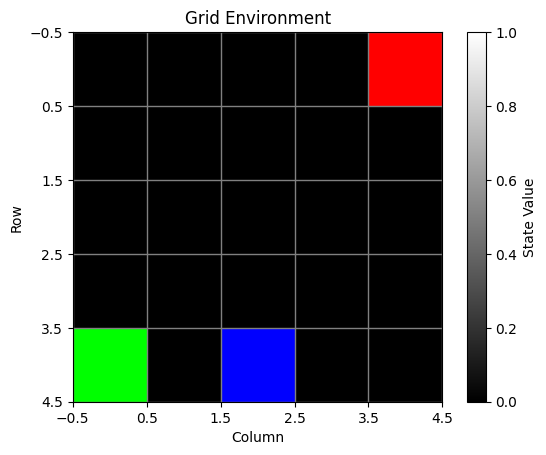

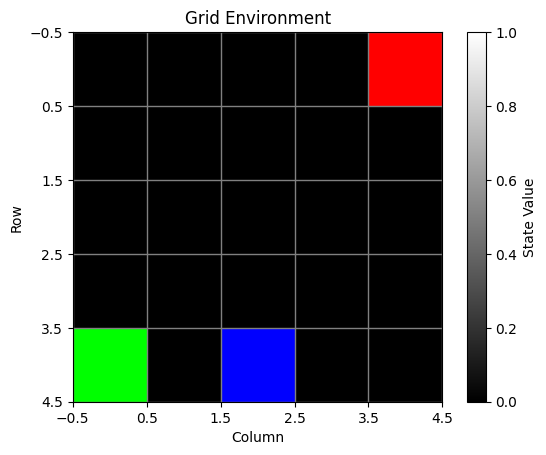

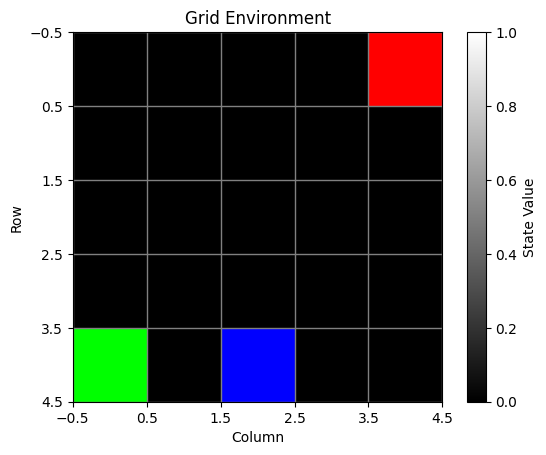

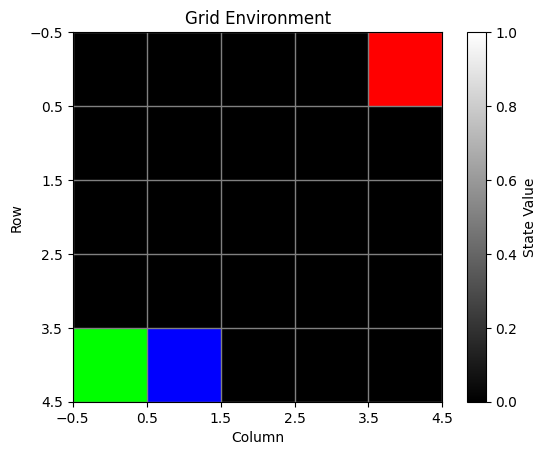

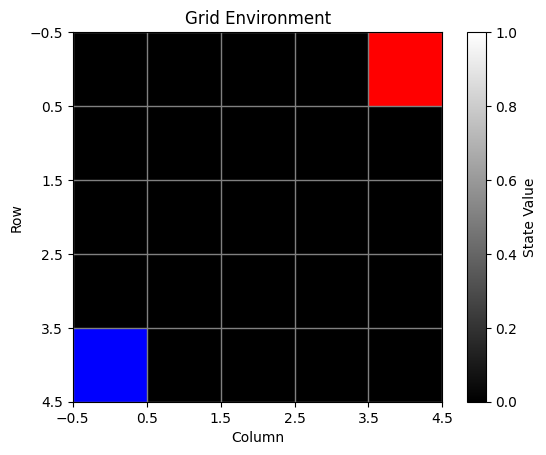

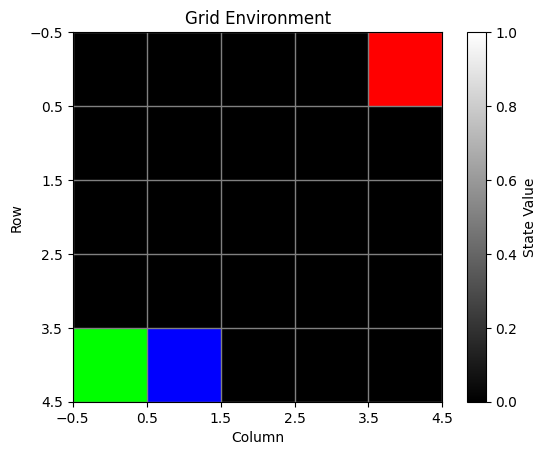

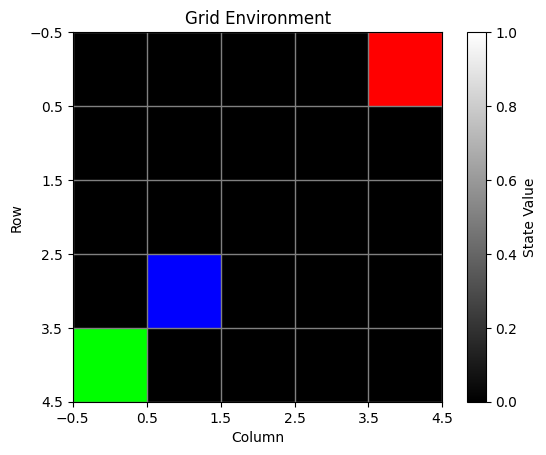

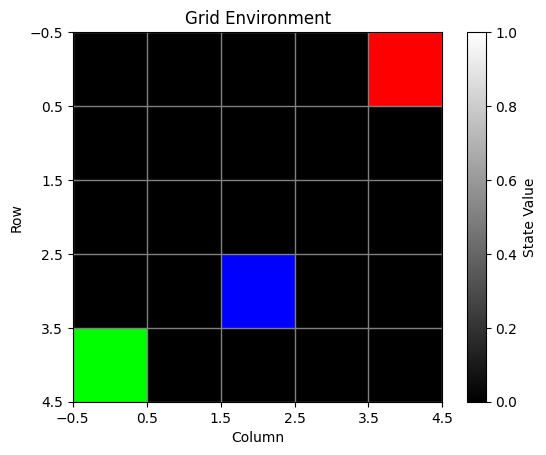

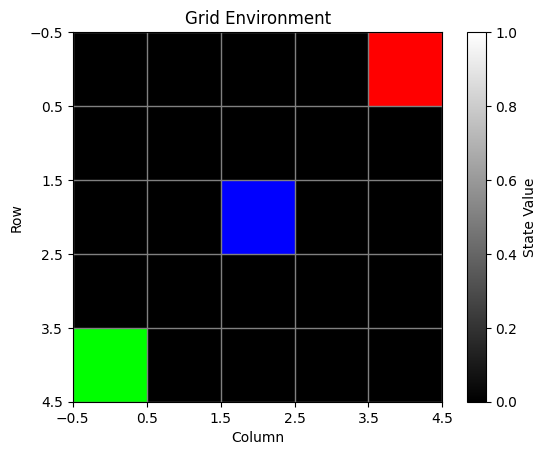

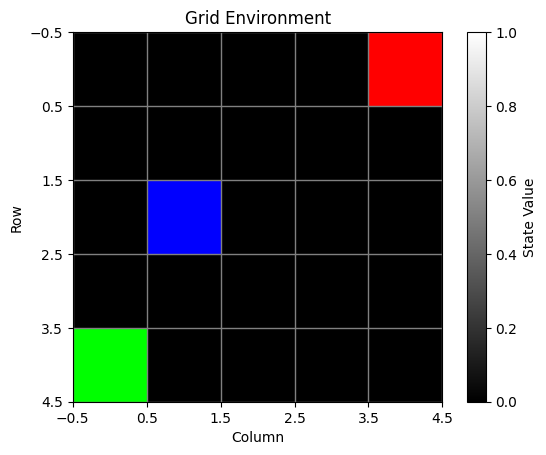

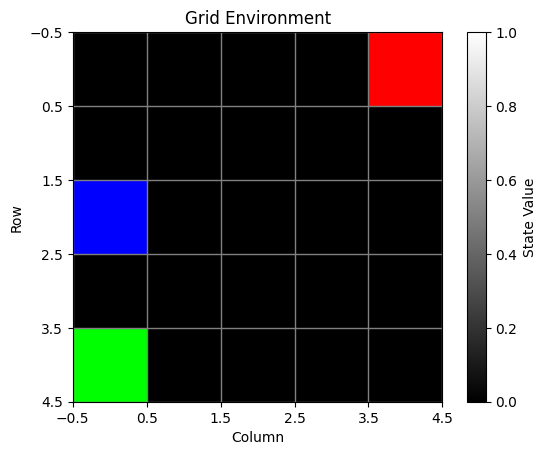

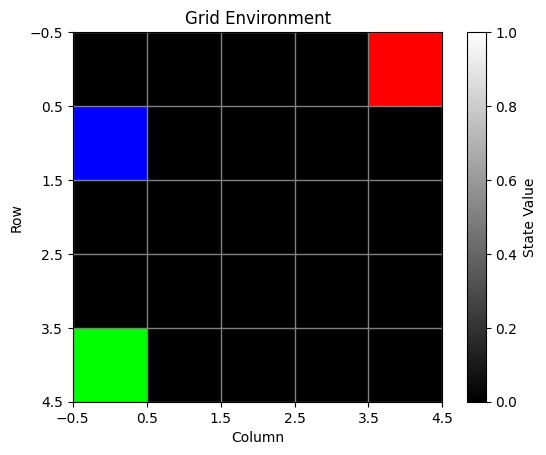

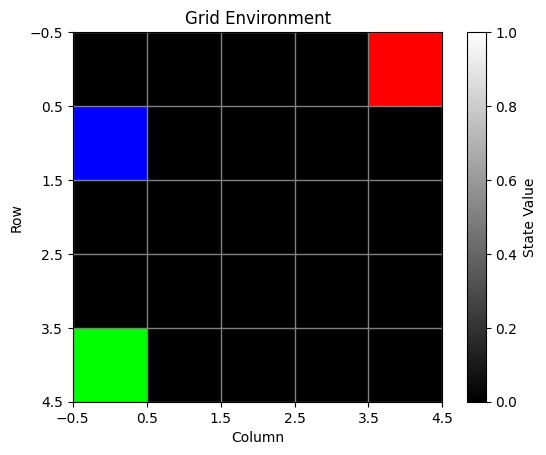

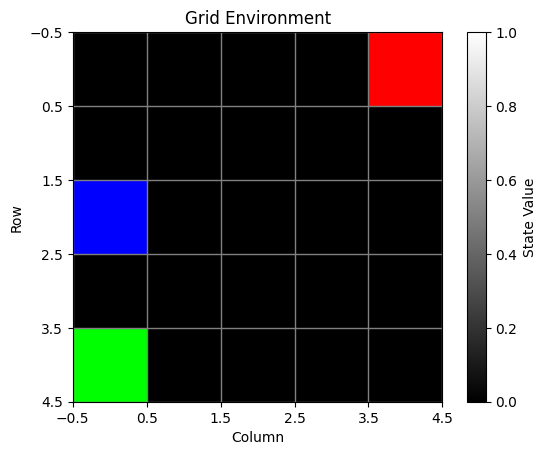

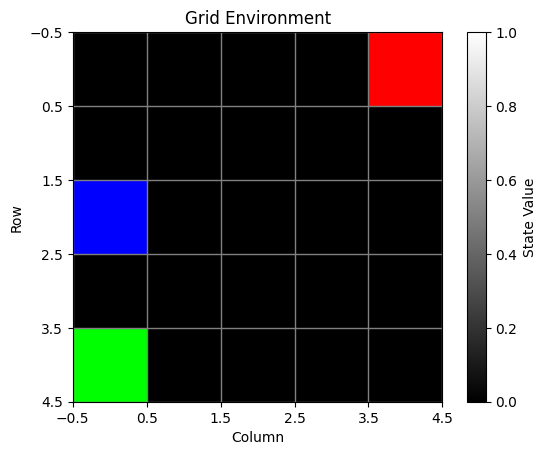

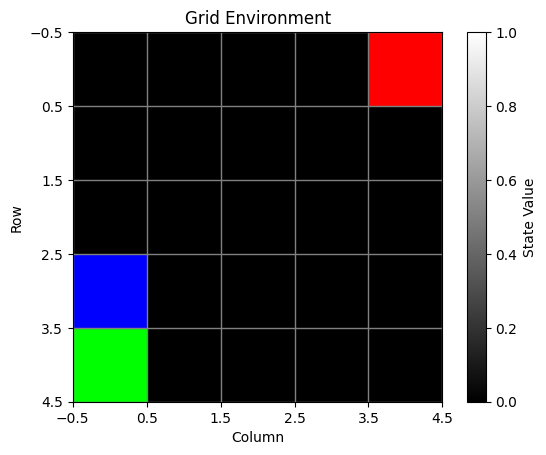

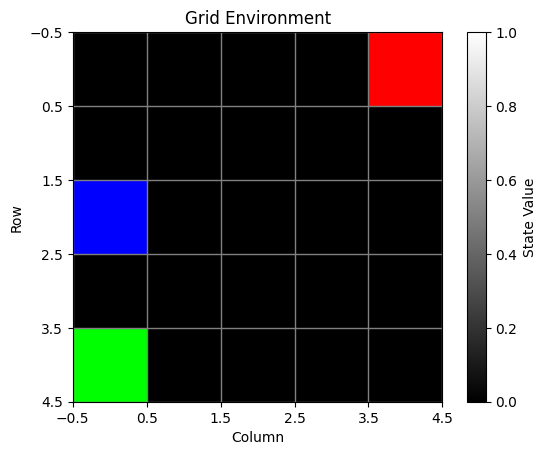

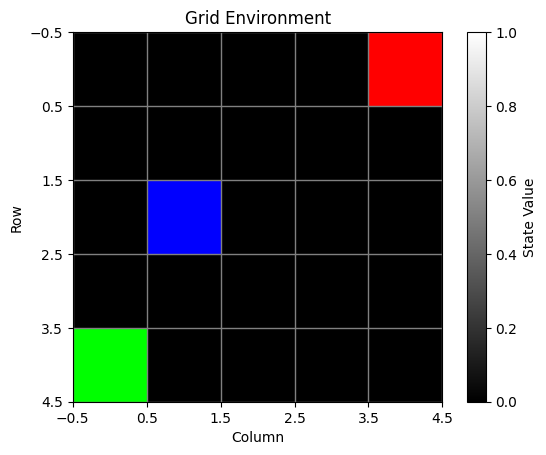

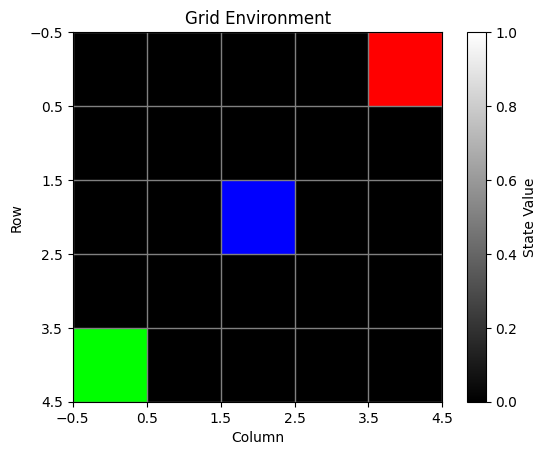

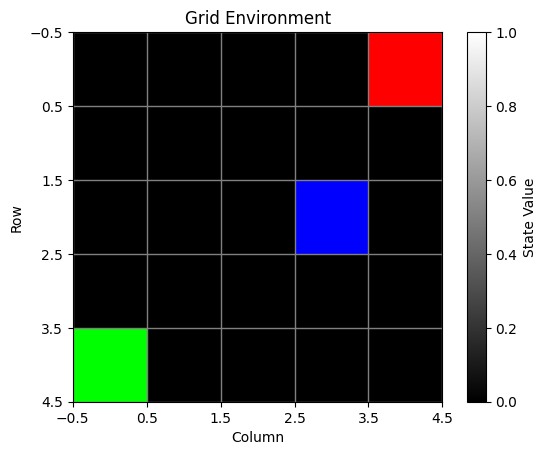

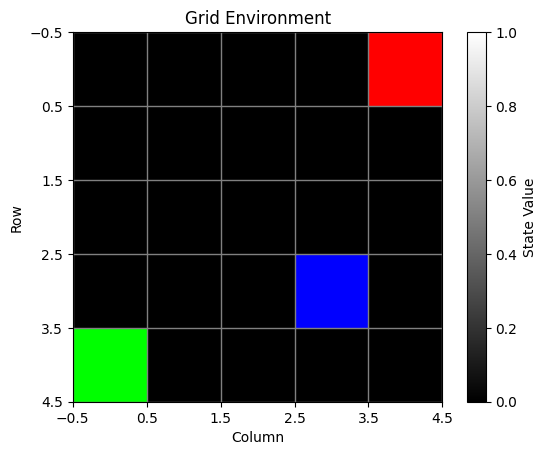

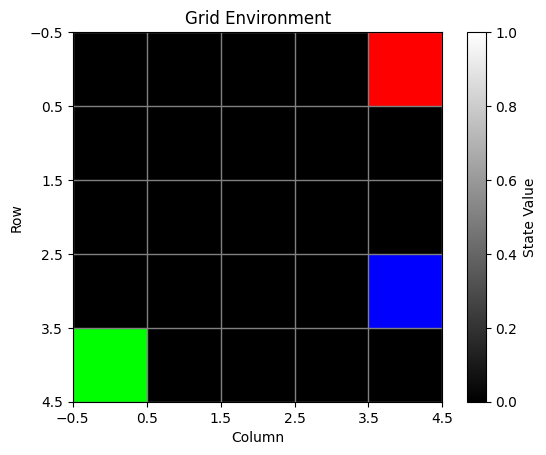

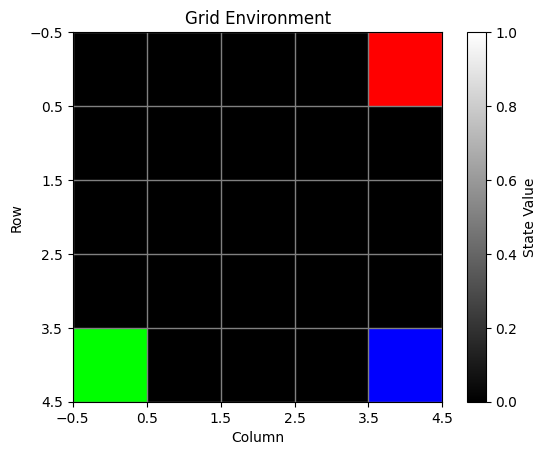

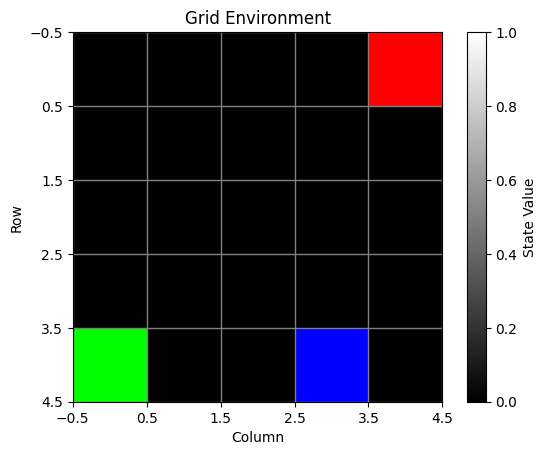

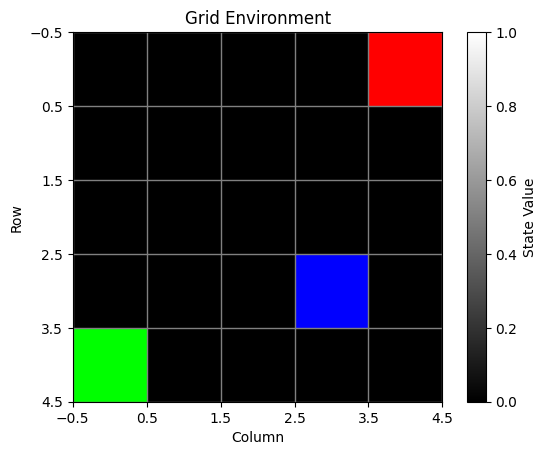

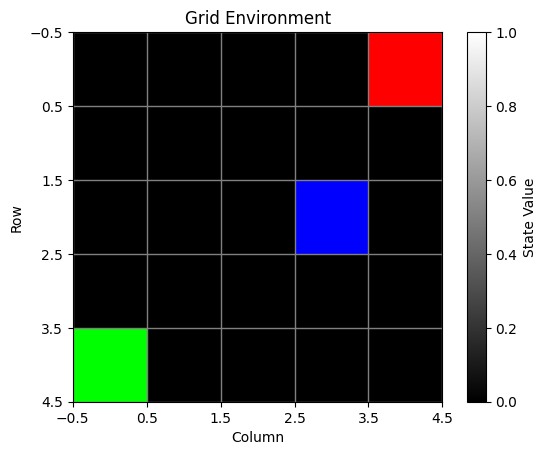

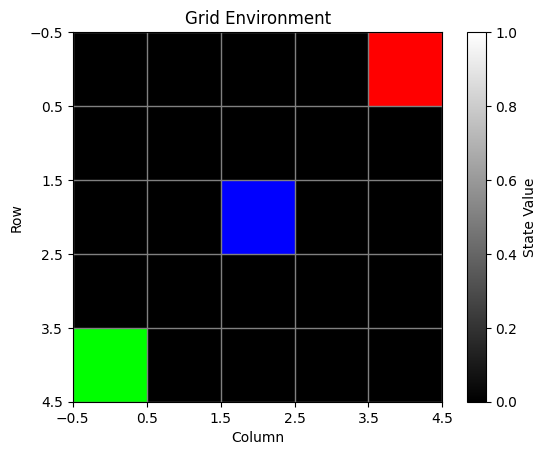

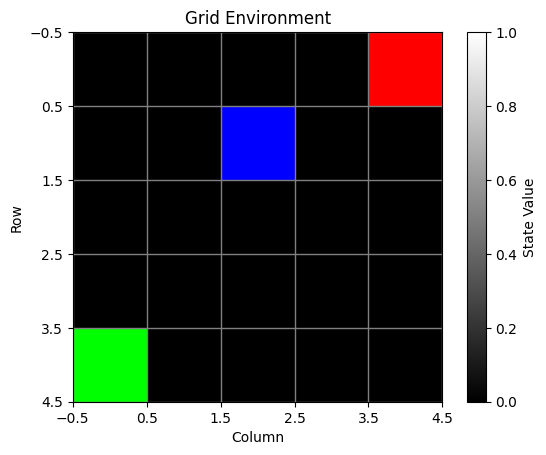

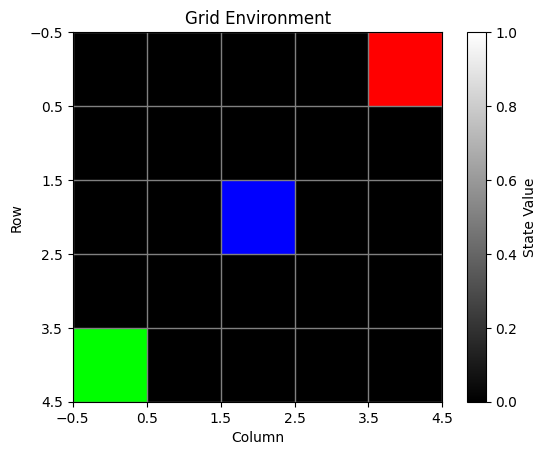

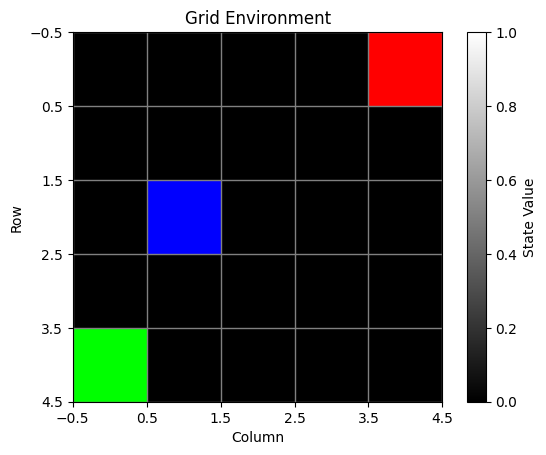

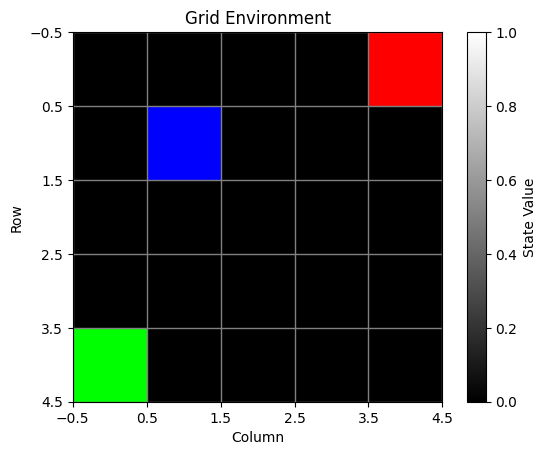

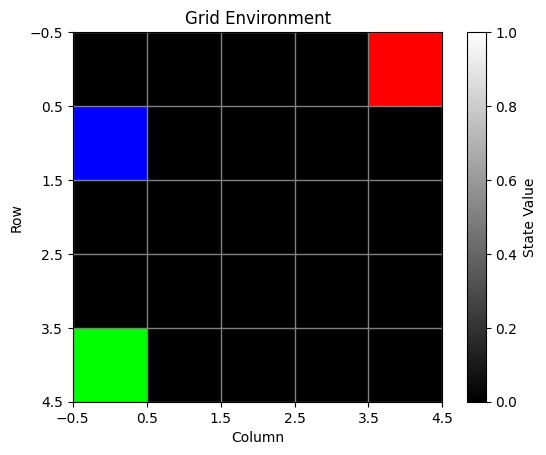

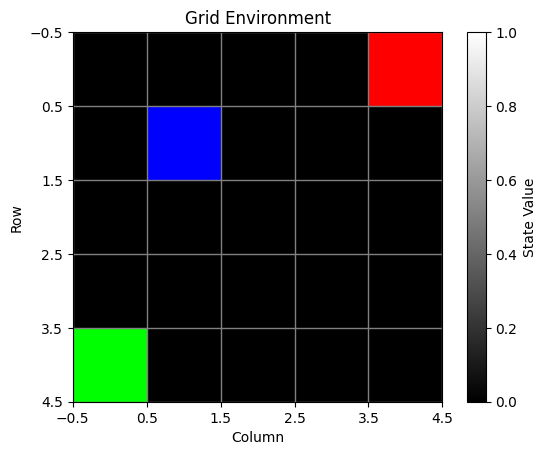

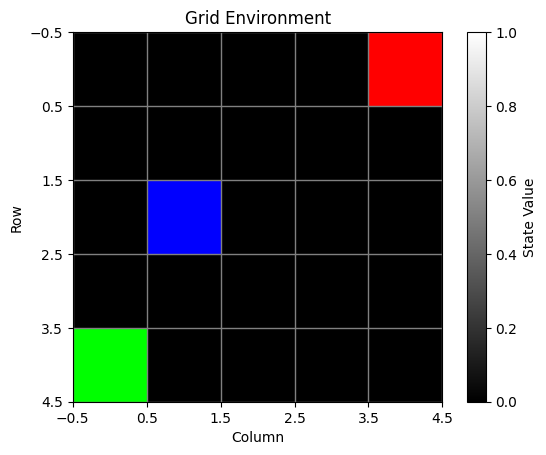

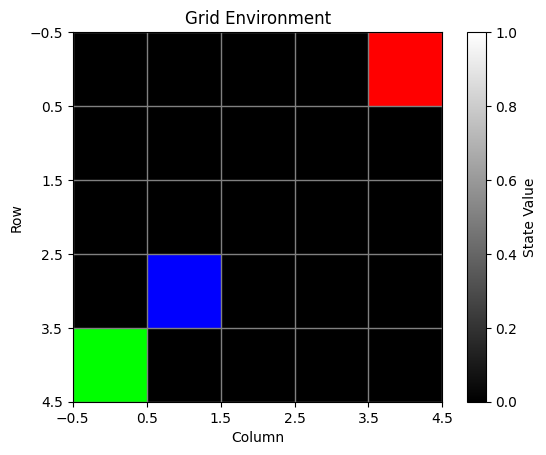

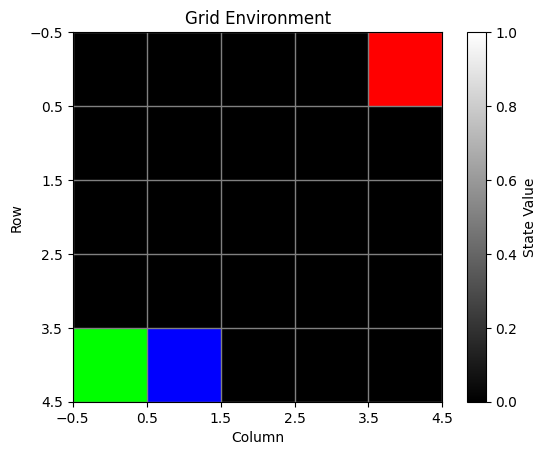

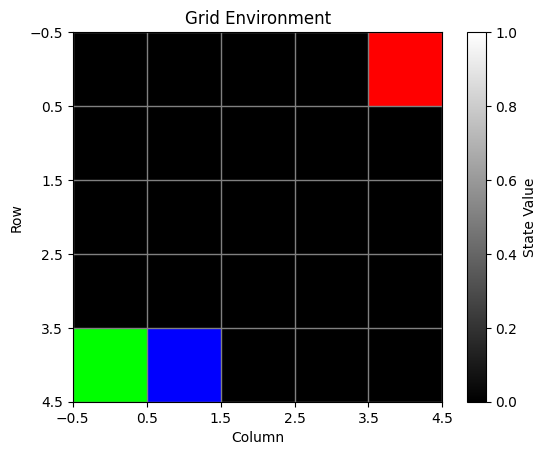

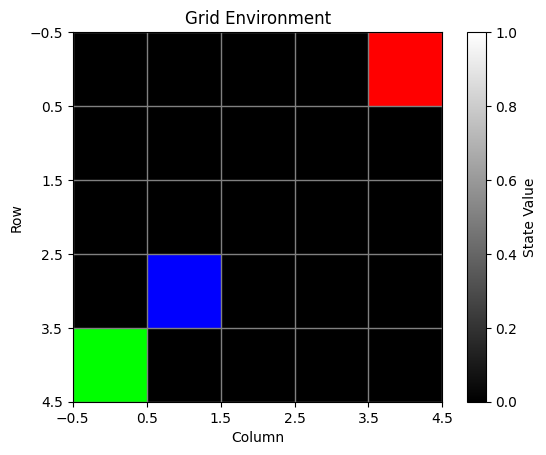

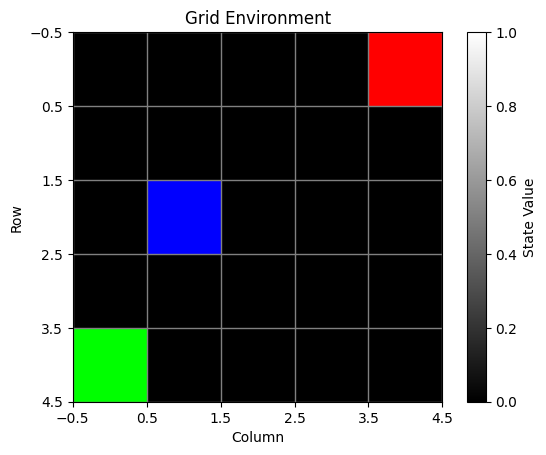

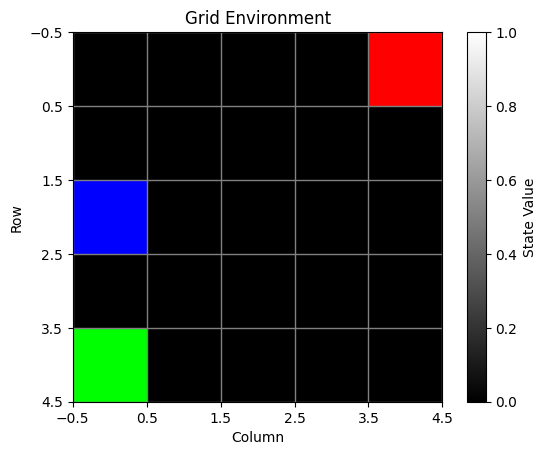

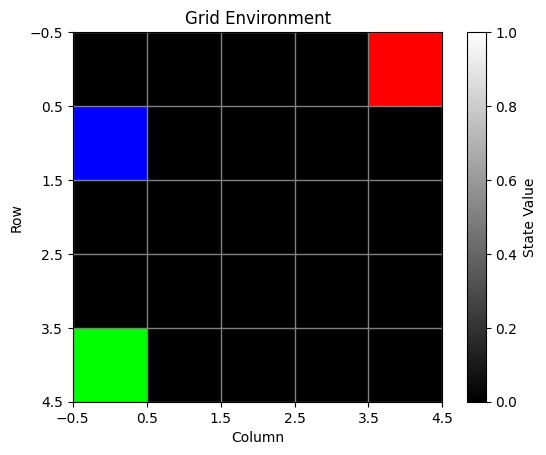

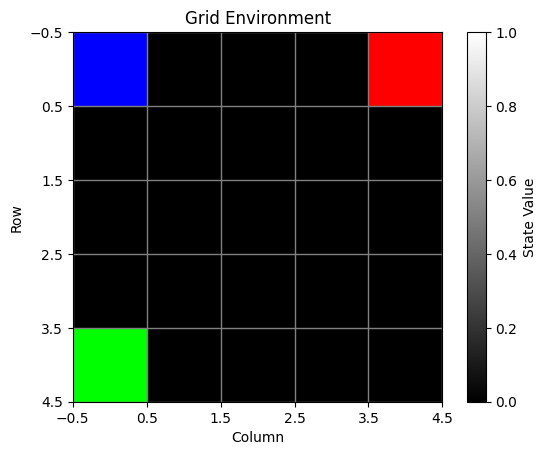

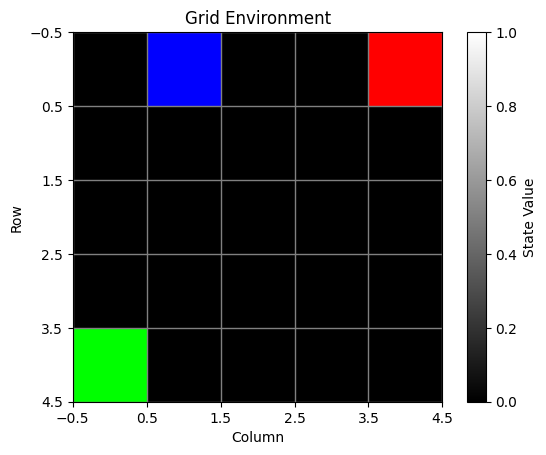

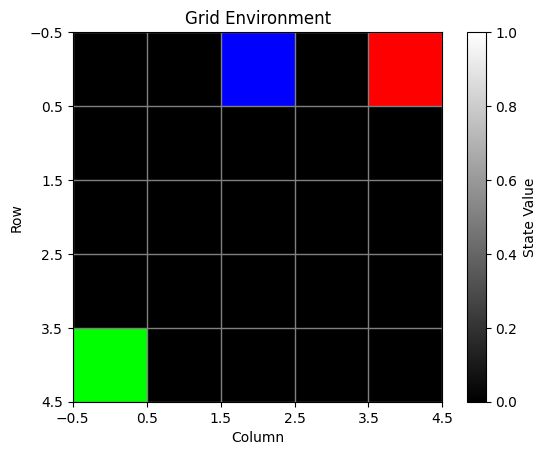

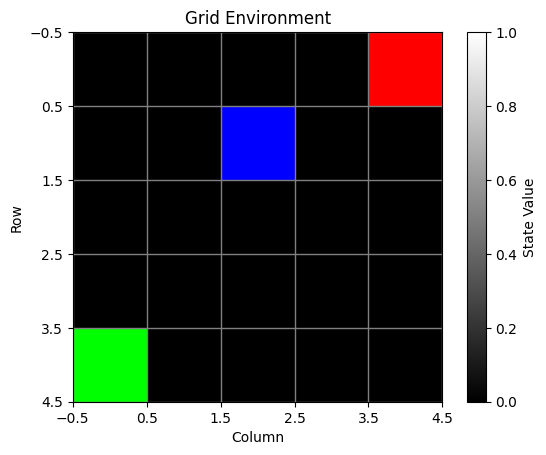

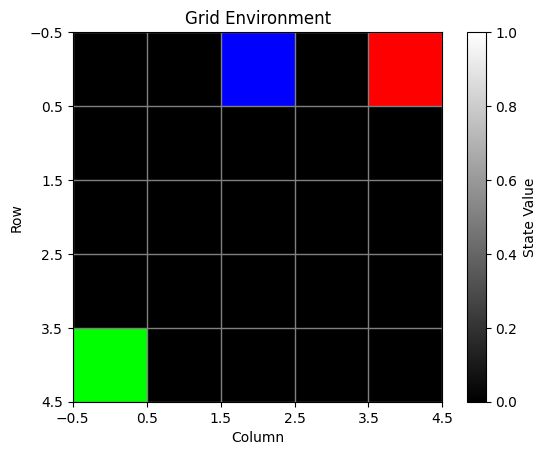

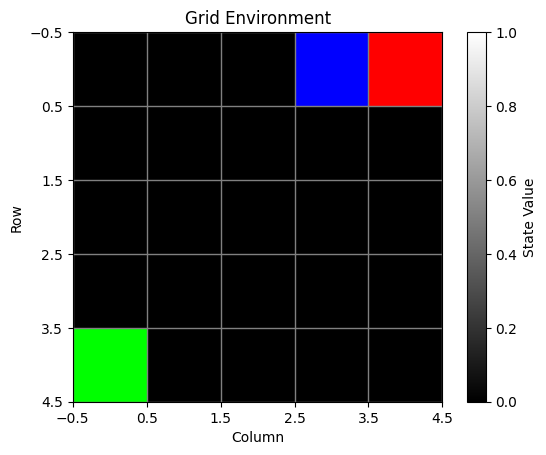

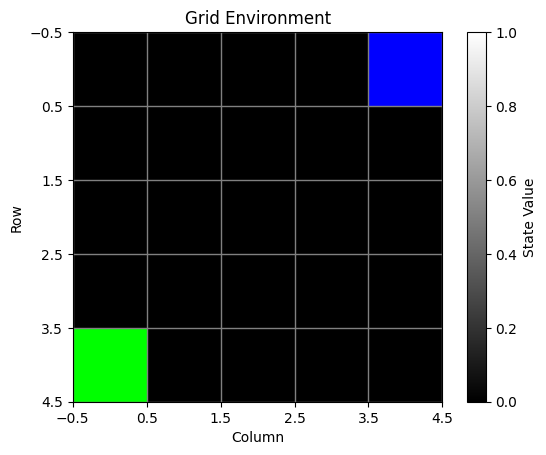

End game! Reward:  -114.0


In [5]:
environment = base_env
agent_info = {"num_actions": 4, "num_states": 25, "epsilon": 0.1, "step_size": 0.1, "discount": 1.0, "seed": 0}
agent = QLearningAgent()
agent.agent_init(agent_info)

for i_episode in range(1):
    total_reward = 0.0
    num_steps = 1
    last_state = environment.env_start()
    last_action = agent.agent_start(last_state)
    observation = (last_state, last_action)
    while True:
        (reward, last_state, term) = environment.env_step(last_action)
        total_reward += reward

        env_visualizer.visualize()
        
        if term:
            agent.agent_end(reward)
            roat = (reward, last_state, None, term)
            print('End game! Reward: ', total_reward)
            break
        else:
            num_steps += 1
            last_action = agent.agent_step(reward, last_state)
            roat = (reward, last_state, last_action, term)

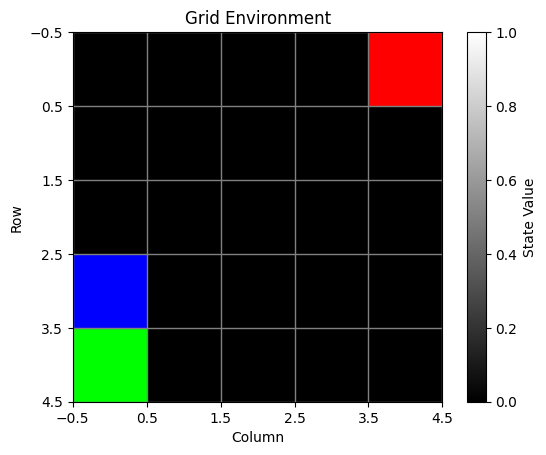

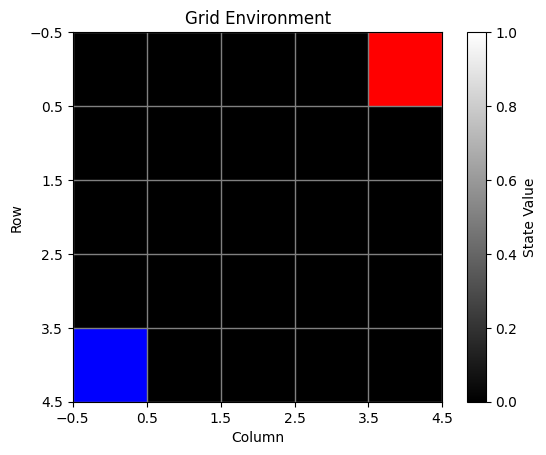

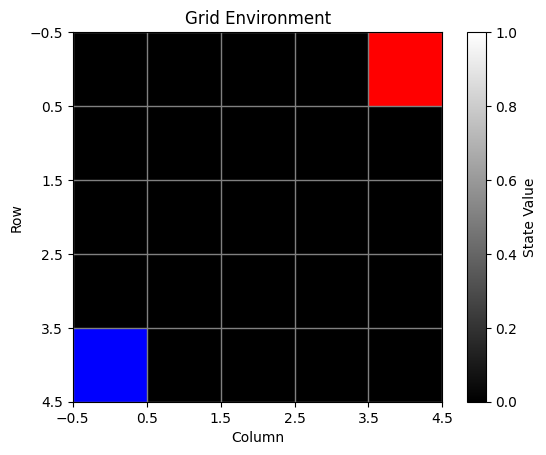

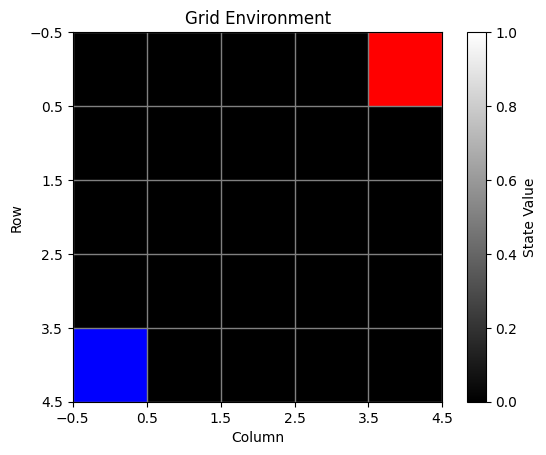

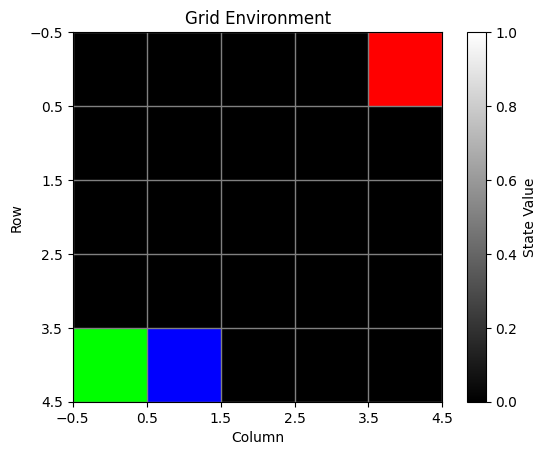

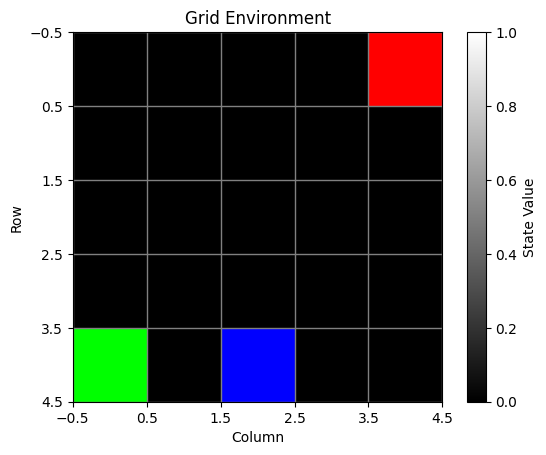

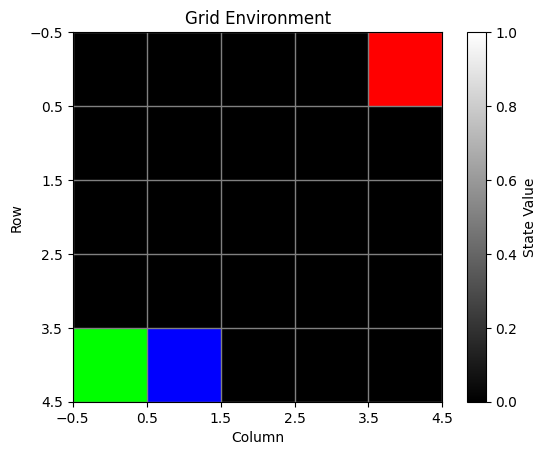

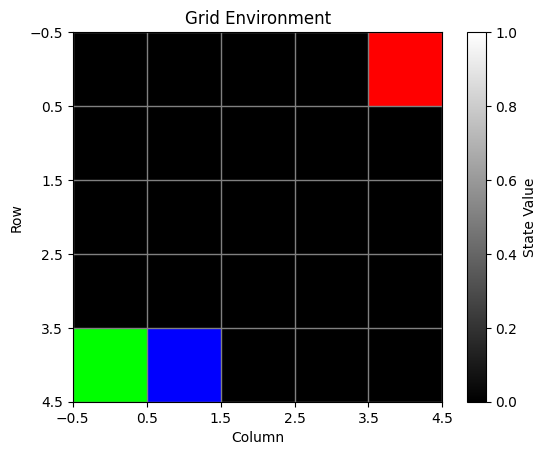

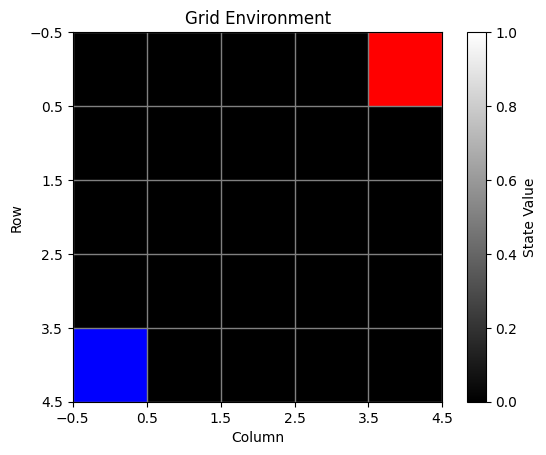

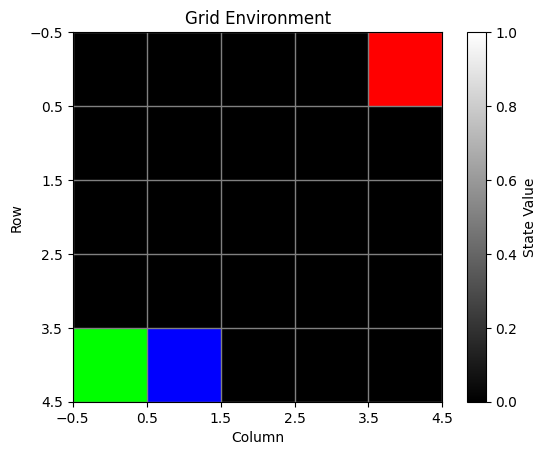

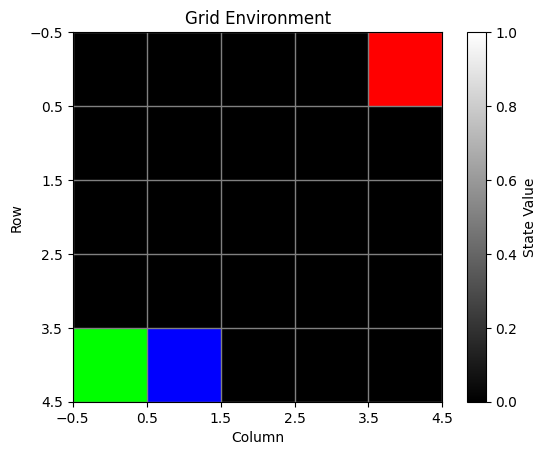

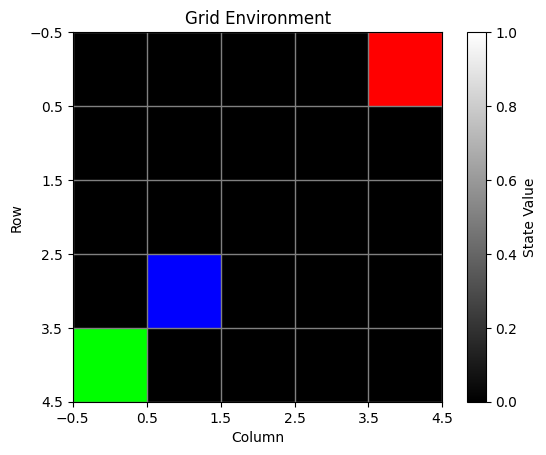

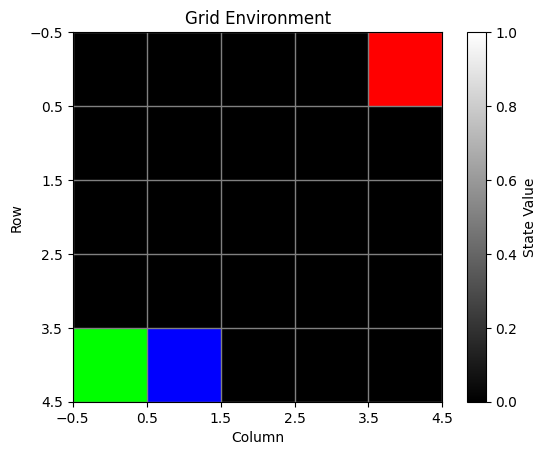

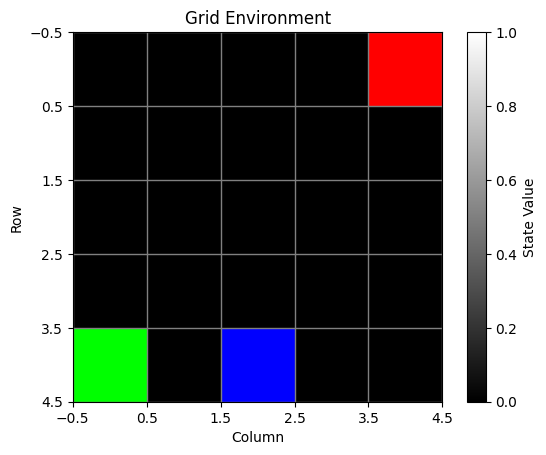

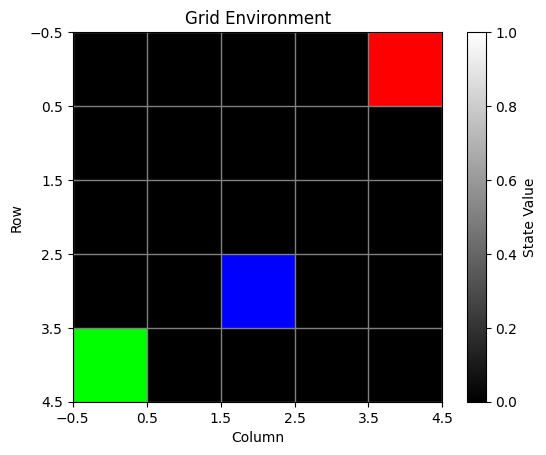

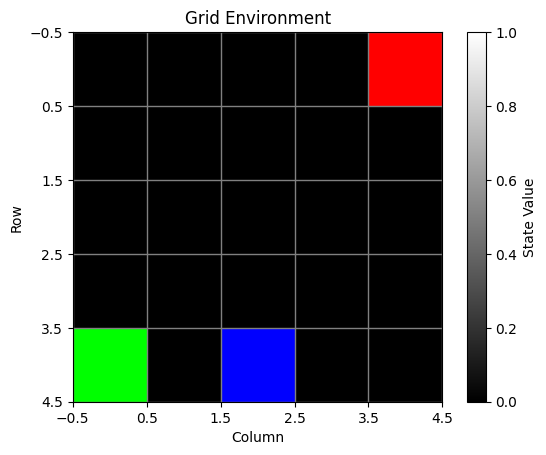

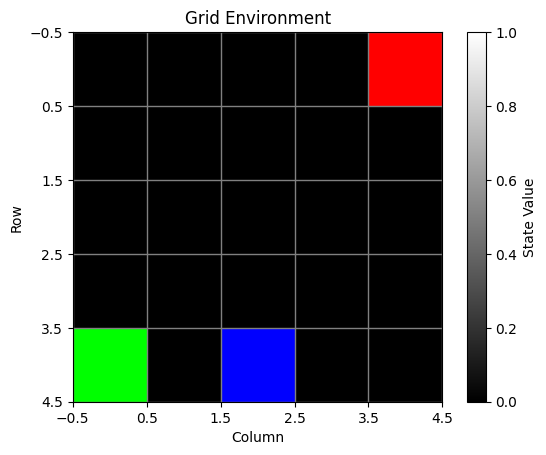

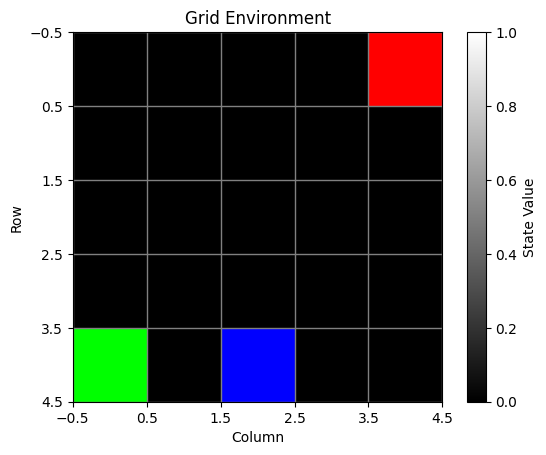

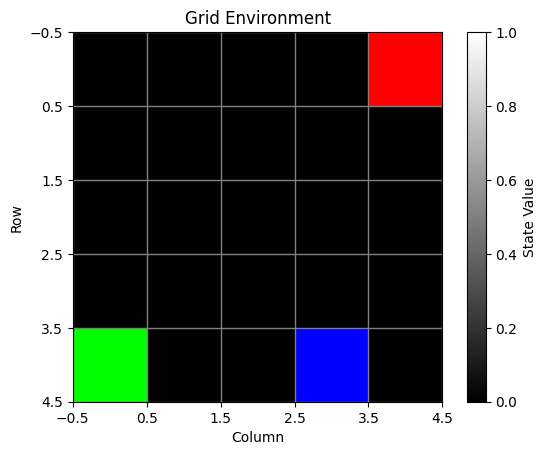

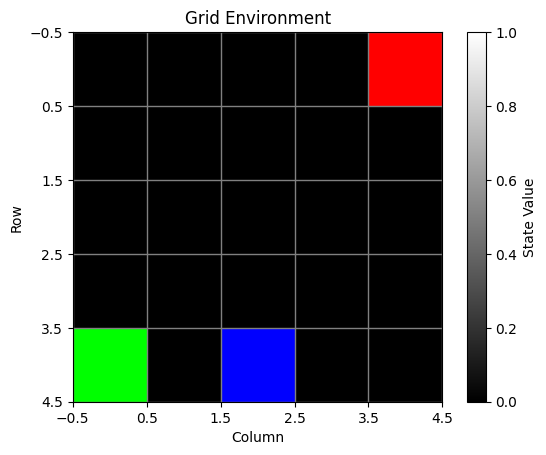

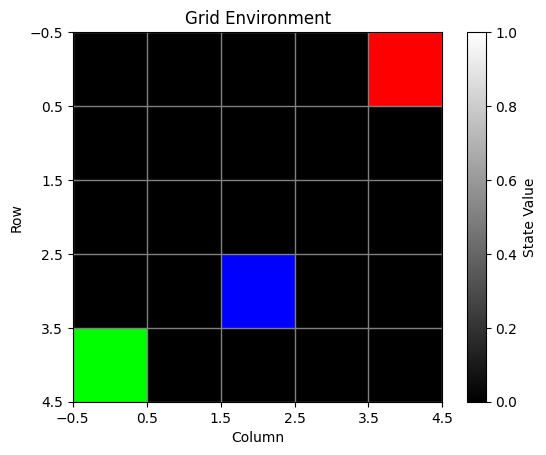

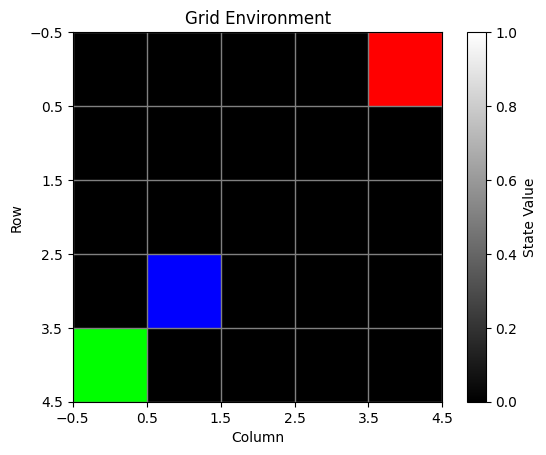

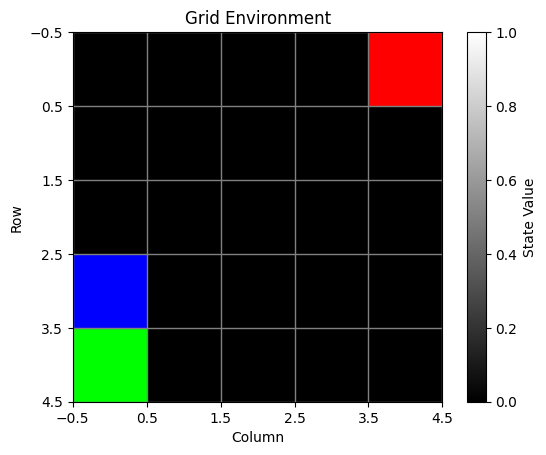

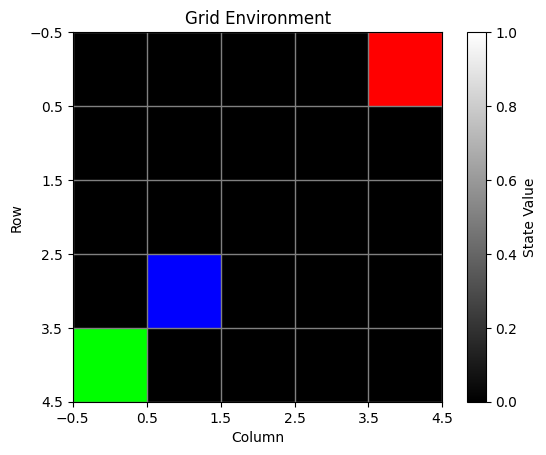

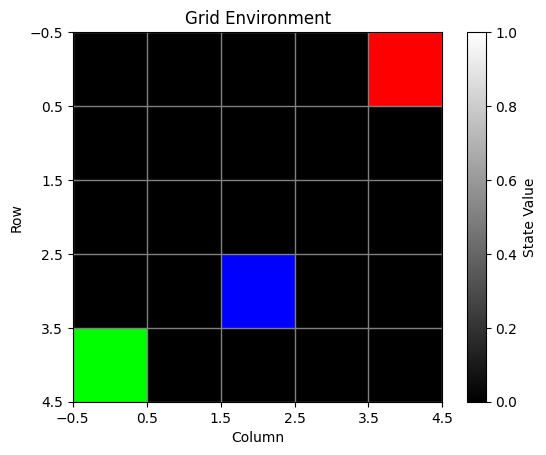

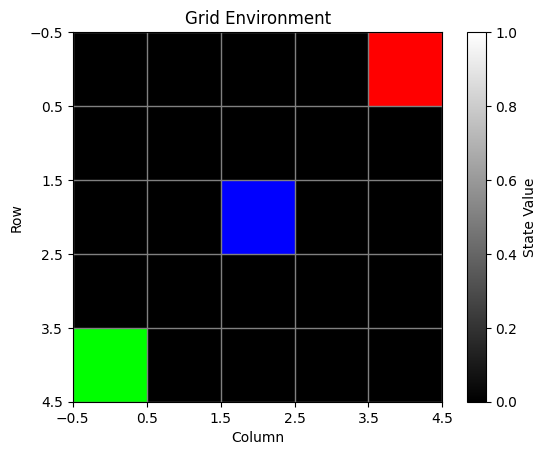

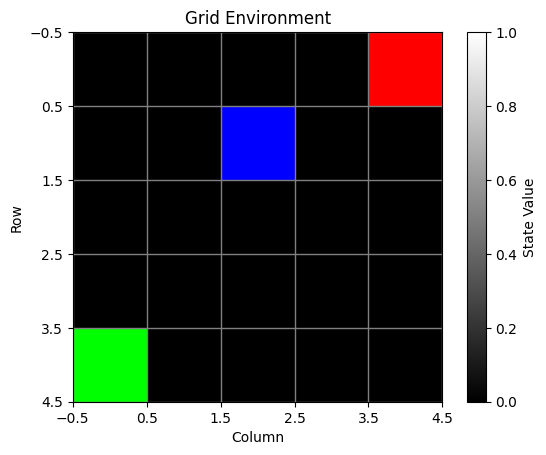

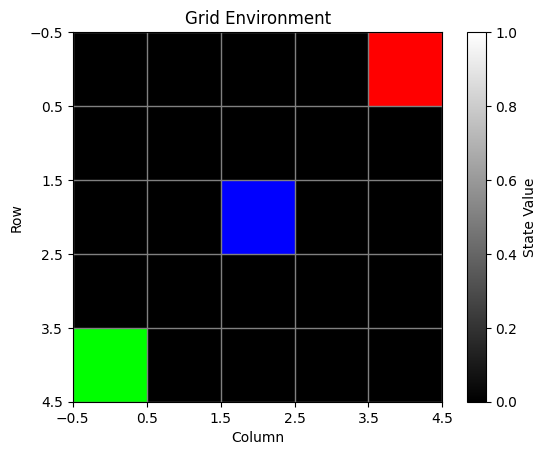

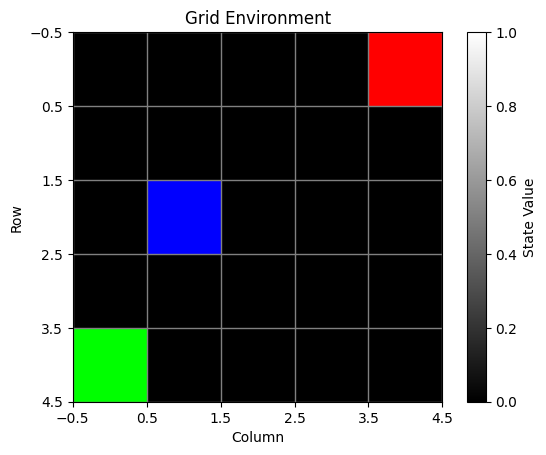

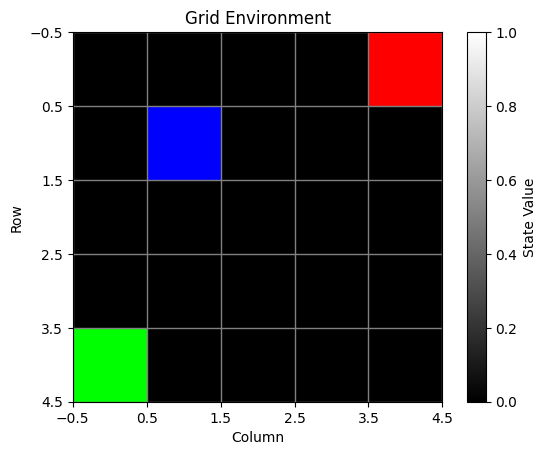

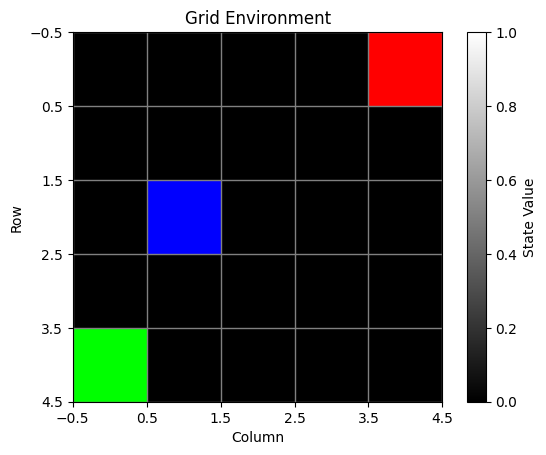

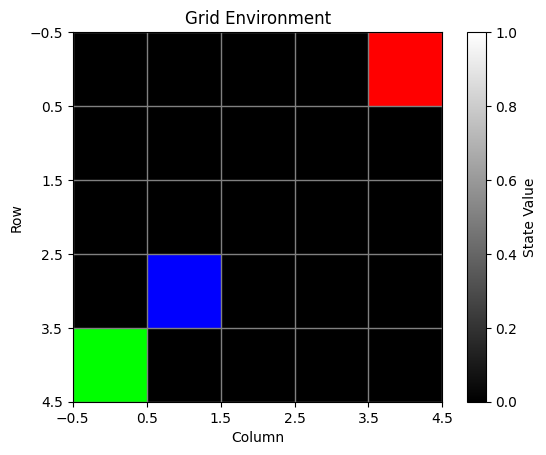

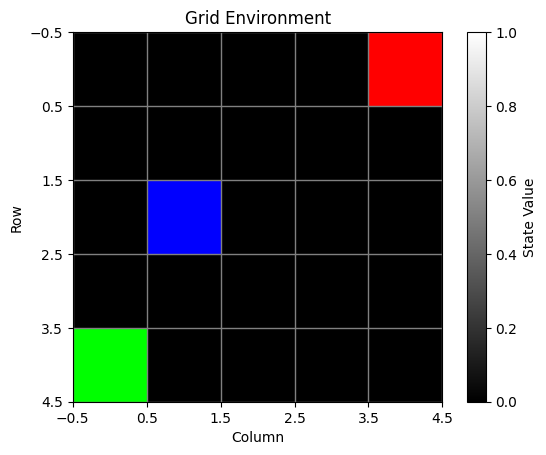

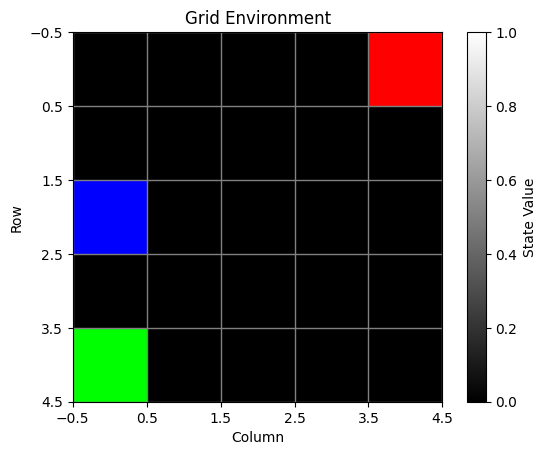

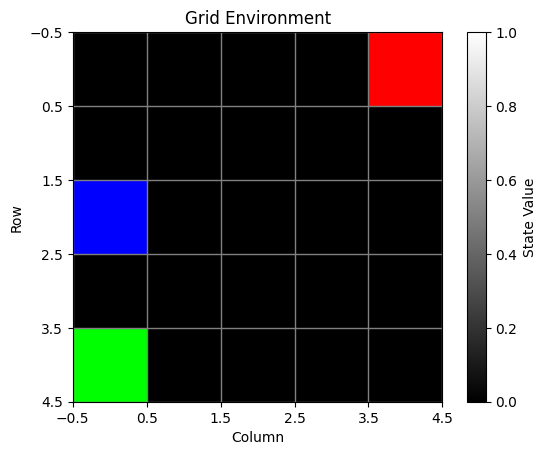

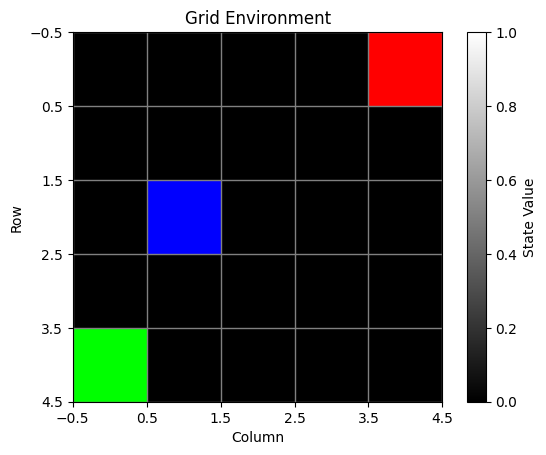

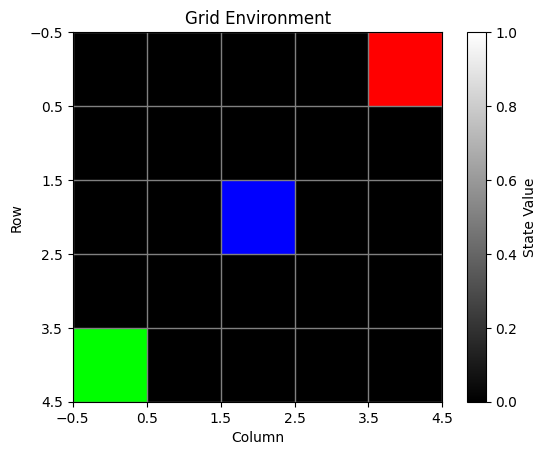

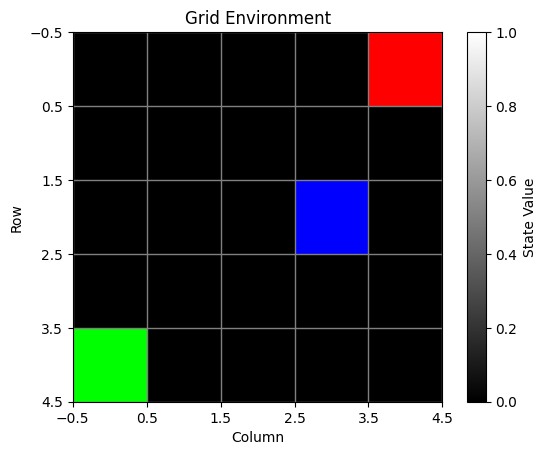

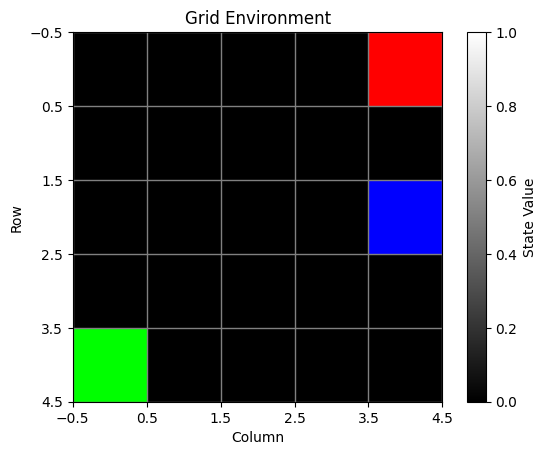

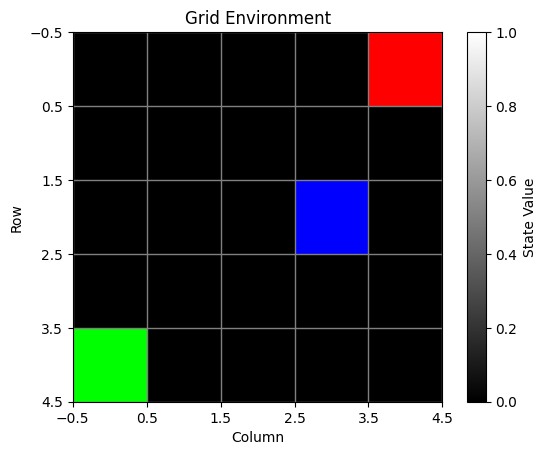

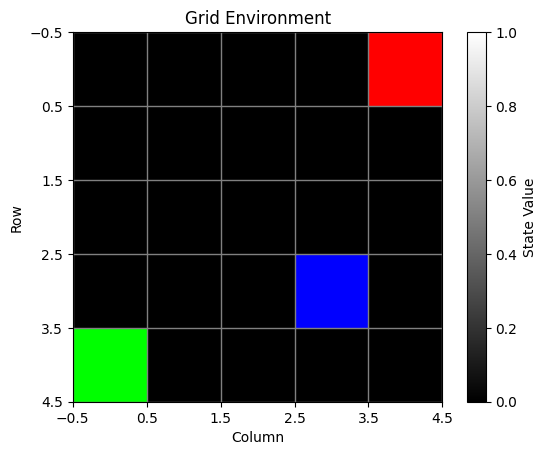

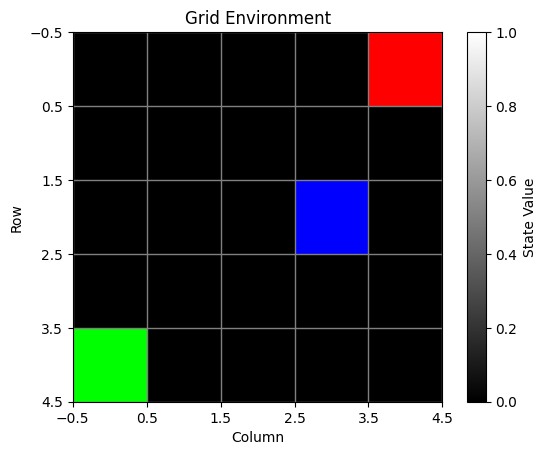

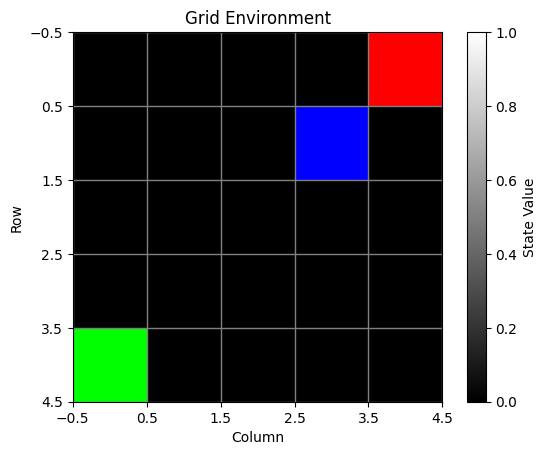

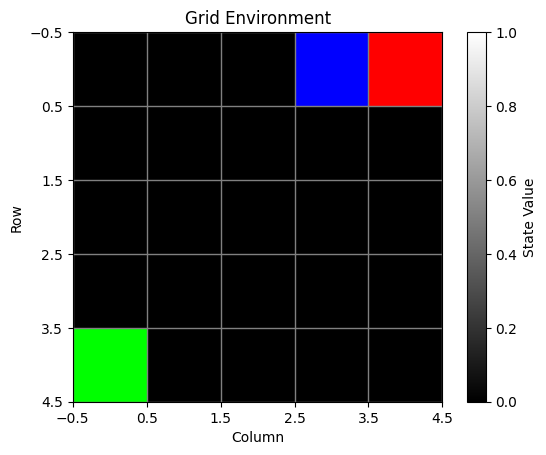

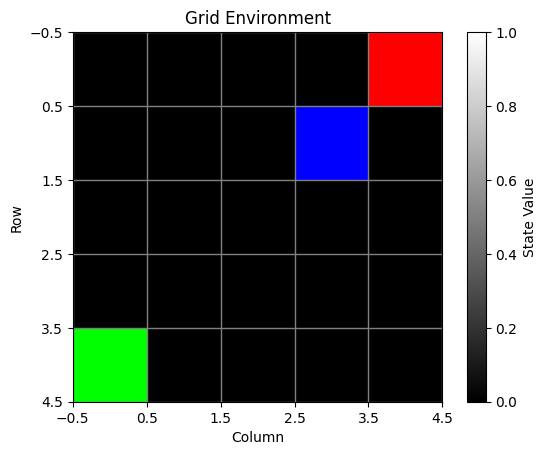

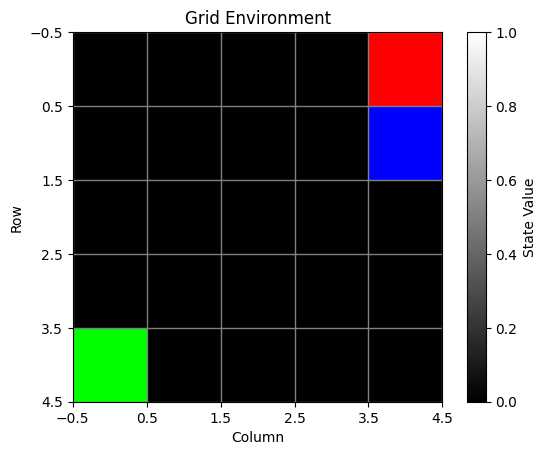

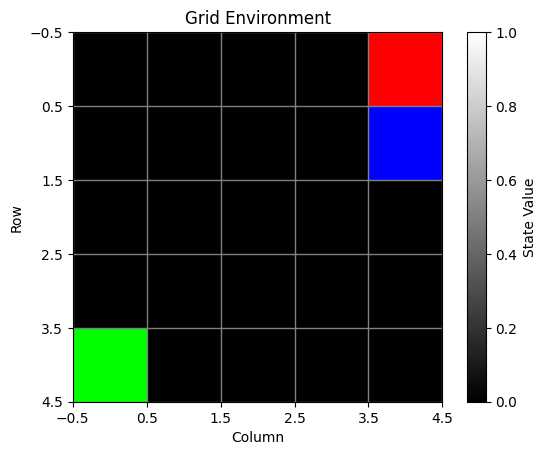

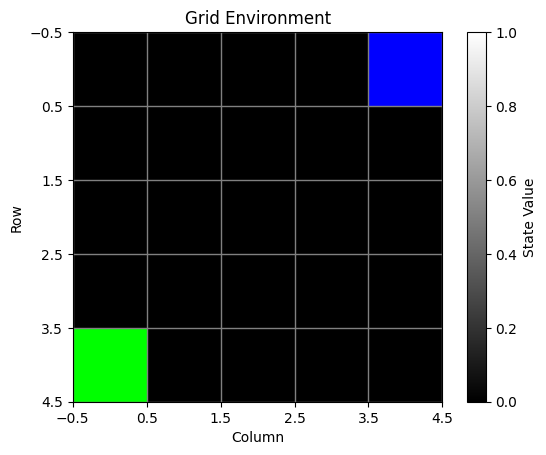

End game! Reward:  -48.0


In [6]:
environment = base_env
agent_info = {"num_actions": 4, "num_states": 25, "epsilon": 0.1, "step_size": 0.1, "discount": 1.0, "seed": 0}
agent = ExpectedSarsaAgent()
agent.agent_init(agent_info)

for i_episode in range(1):
    total_reward = 0.0
    num_steps = 1
    last_state = environment.env_start()
    last_action = agent.agent_start(last_state)
    observation = (last_state, last_action)
    while True:
        (reward, last_state, term) = environment.env_step(last_action)
        total_reward += reward

        env_visualizer.visualize()
        
        if term:
            agent.agent_end(reward)
            roat = (reward, last_state, None, term)
            print('End game! Reward: ', total_reward)
            break
        else:
            num_steps += 1
            last_action = agent.agent_step(reward, last_state)
            roat = (reward, last_state, last_action, term)

In [19]:
agents = {
    "Q-learning": QLearningAgent,
    "Expected Sarsa": ExpectedSarsaAgent
}

env = gridworld_env.Environment
all_reward_sums = {} # Contains sum of rewards during episode
all_state_visits = {} # Contains state visit counts during the last 10 episodes
agent_info = {"num_actions": 4, "num_states": 25, "epsilon": 0.1, "step_size": 0.5, "discount": 1.0}
env_info = {}
num_runs = 100 # The number of runs
num_episodes = 500 # The number of episodes in each run

for algorithm in ["Q-learning", "Expected Sarsa"]:
    all_reward_sums[algorithm] = []
    all_state_visits[algorithm] = []
    for run in tqdm(range(num_runs)):
        agent_info["seed"] = run
        rl_glue = RLGlue(env, agents[algorithm])
        rl_glue.rl_init(agent_info, env_info)

        reward_sums = []
        state_visits = np.zeros(25)
#         last_episode_total_reward = 0
        for episode in range(num_episodes):
            if episode < num_episodes - 10:
                # Runs an episode
                rl_glue.rl_episode(0)
            else:
                # Runs an episode while keeping track of visited states
                state, action = rl_glue.rl_start()
                state_visits[state] += 1
                is_terminal = False
                while not is_terminal:
                    reward, state, action, is_terminal = rl_glue.rl_step()
                    state_visits[state] += 1

            reward_sums.append(rl_glue.rl_return())
#             last_episode_total_reward = rl_glue.rl_return()

        all_reward_sums[algorithm].append(reward_sums)
        all_state_visits[algorithm].append(state_visits)

100%|██████████| 100/100 [00:17<00:00,  5.83it/s]


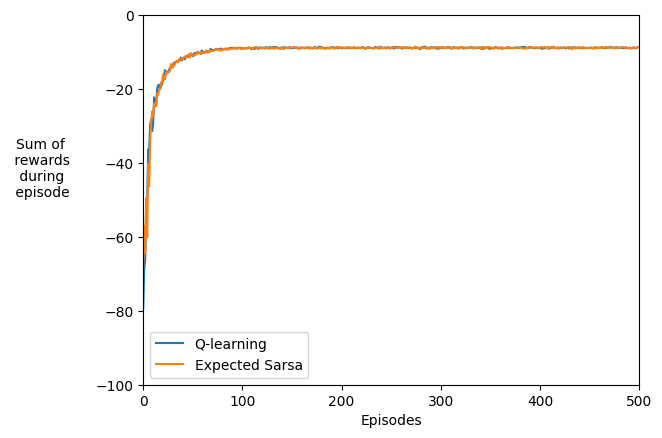

In [20]:
for algorithm in ["Q-learning", "Expected Sarsa"]:
    plt.plot(np.mean(all_reward_sums[algorithm], axis=0), label=algorithm)
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode",rotation=0, labelpad=40)
plt.xlim(0,500)
plt.ylim(-100,0)
plt.legend()
plt.show()

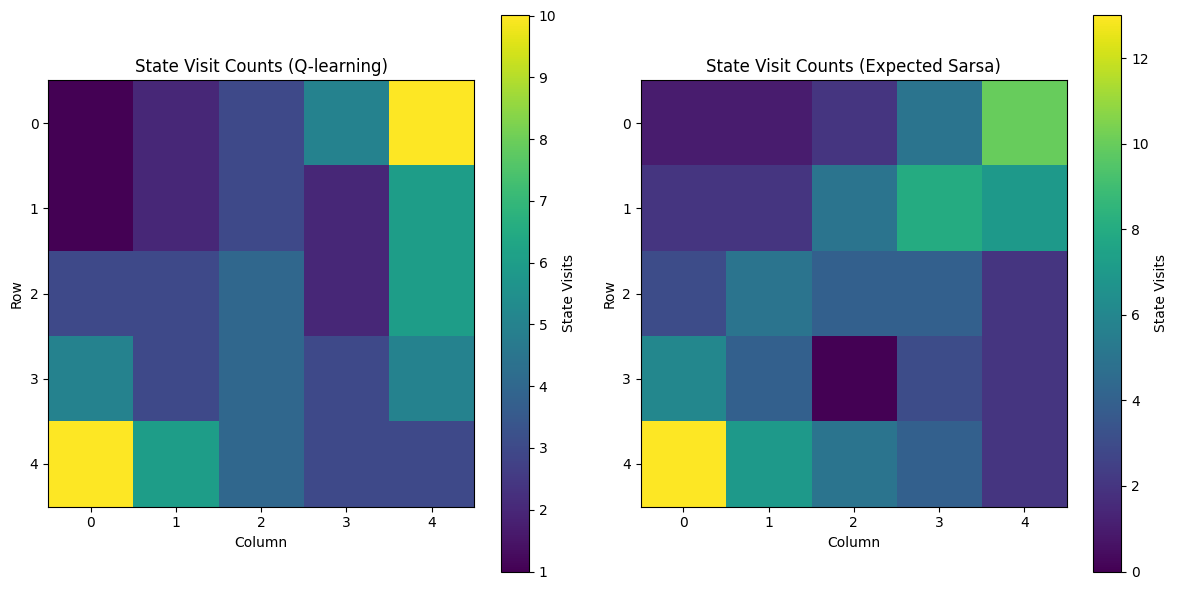

In [30]:
algorithms = ["Q-learning", "Expected Sarsa"]
num_algorithms = len(algorithms)

plt.figure(figsize=(12, 6))
for i, algo in enumerate(algorithms, start=1):
    plt.subplot(1, num_algorithms, i)
    average_state_visits = np.array(all_state_visits[algo][-10:]).mean(axis=0)
    title = f'State Visit Counts ({algo})'
    visualize_state_visits(average_state_visits, title)  # Use average_state_visits here instead of all_state_visits_for_algorithm[-1]

plt.tight_layout()
plt.show()